In [1]:
library(ggplot2)
library(dplyr)
library(paletteer)
library(ggpubr)

library(RColorBrewer)
library(scales)
library(pals)
library(gridExtra)

library(SingleCellExperiment)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarD

In [2]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")

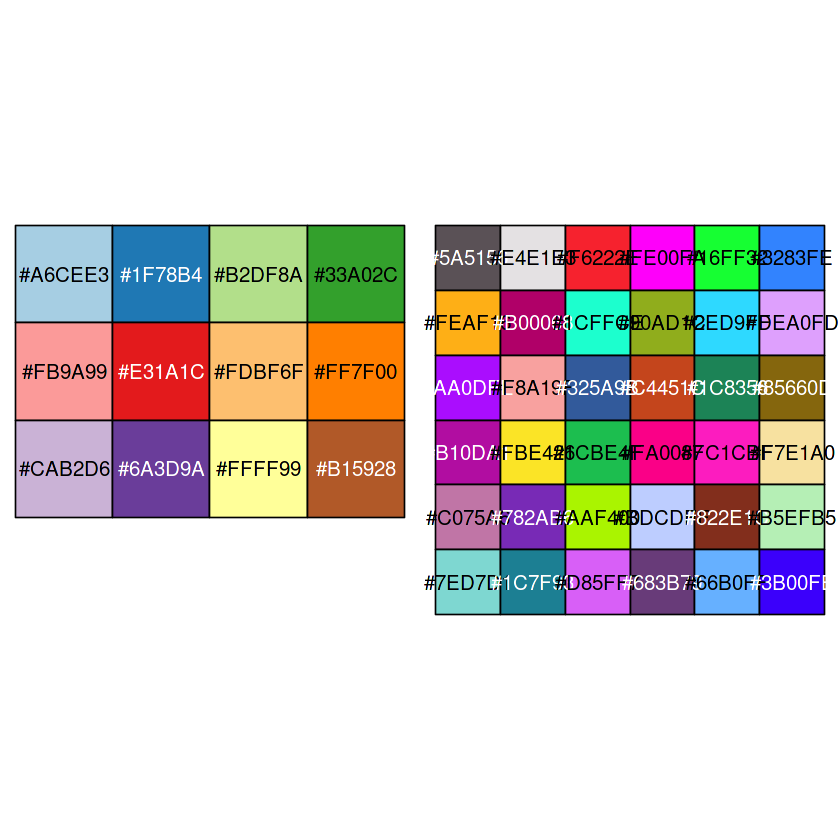

In [3]:
par(mfrow=c(1,2))
# method color
my_col_m <- brewer.pal(12, "Paired")
show_col(my_col_m)
# cell type color
my_col_c <- unlist(polychrome())
show_col(my_col_c)

In [4]:
dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics", "candidate2") #"Ma_2019",
k_ls <- c(9, 13, 10, 13, 15, 10)

# Buenrostro_2018

## Read meta data file

In [84]:
i <- 1
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [85]:
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metric_file.tsv"), sep="\t", header=TRUE)

In [86]:
# df1 <- read.table("metric_file.tsv", sep="\t", header=TRUE)
# df2 <- read.table("Chen_2019/metric_file.tsv", sep="\t", header=TRUE)
# df <- rbind(df1, df2)
dim(df)
unique(df$resolution)

[1] 512  10

[1] 0.050 0.150 0.175 0.200 0.225 0.250 0.350 0.400 0.450 0.550 0.600 0.650
[13] 0.750 0.800 0.850 0.900

In [88]:
setwd(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset))

In [ ]:
df$rds_file <- gsub("_metrics.tsv", "_evaluation.RDS", df$file)
df["clustering_file"] <- gsub("evaluation", "clustering", df$file)
df["clustering_file"] <- gsub("_metrics", "", df$clustering_file)
df["long_method"] <- paste(df$method, df$feature_type, df$distance, sep="_")
df$long_method <-gsub("_default","",as.character(df$long_method))
df$snn_file <- paste0(dirname(df$clustering_file), "/sobj_SNN.RDS")

In [35]:
head(df)

,file,scenario,workflow,method,feature_type,tile_size,distance,ndim,filename,resolution,rds_file,clustering_file,long_method,snn_file
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.05_metrics.tsv,0.050,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.05.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
2,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.15_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.15_metrics.tsv,0.150,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.15_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.15.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
3,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.175_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.175_metrics.tsv,0.175,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.175_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.175.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
4,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.2_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.2_metrics.tsv,0.200,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.2_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.2.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
5,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.225_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.225_metrics.tsv,0.225,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.225_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.225.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
6,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.25_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.25_metrics.tsv,0.250,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.25_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.25.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS


In [23]:
df$n_clusters <- 0
for (i in 1:length(df$clustering_file)){
    clusterings <- read.table(df$clustering_file[i])
    df[i, "n_clusters"] <- max(clusterings$clusterings)
}

In [24]:
df_metrics <- data.frame(matrix(ncol = 13, nrow = 0))
colnames(df_metrics) <- c("n_clusters","metric","value","method",
                          "long_method","feature_type","tile_size",
                          "distance","ndim","resolution","rds_file", 
                          "clustering_file", "snn_file")

In [25]:
j <- 1
for(i in 1:dim(df)[1]){
    file <- df$file[i]
    df_metric <- read.table(df$file[i], sep="\t", header=TRUE)
    for(metric in rownames(df_metric)){
        df_metrics[j, "metric"] <- metric
        df_metrics[j, "value"] <- df_metric[metric, "value"]
        df_metrics[j ,c("n_clusters","method","feature_type","tile_size","distance","ndim","resolution", 
                        "long_method", "rds_file", "clustering_file", "snn_file")] <- df[i, c("n_clusters","method","feature_type",
                                                                                              "tile_size","distance","ndim","resolution",
                                                                                              "long_method", "rds_file", "clustering_file", 
                                                                                              "snn_file")]
        j <- j+1
    }
    }

In [26]:
df_metrics$resolution <- as.numeric(df_metrics$resolution)

## Recalculate ARI2, AW2, AV2 if necessary

In [37]:
df_ari2 <- df_metrics[df_metrics$metric=="ARI",]
df_ari2$metric <- "ARI2"
df_aw2 <- df_metrics[df_metrics$metric=="ARI",]
df_aw2$metric <- "AW2"
df_av2 <- df_metrics[df_metrics$metric=="ARI",]
df_av2$metric <- "AV2"

In [57]:
for (i in 1:dim(df)[1]) {
    clustering_file <- df[i, "clustering_file"]
    df_clustering <-  read.table(file = clustering_file, sep = "\t")
    rownames(df_clustering) <- df_clustering$barcode
    
    input <- df[i,"snn_file"]
    sobj <- readRDS(input)
    true_labels <- sobj$ground_truth

    clustering <- unlist(lapply(Cells(sobj), function(x){df_clustering[x, "clusterings"]}))
    res <- adjusted_wallance_indices(true_labels, clustering)
    awi <- res$Awi
    avj <- res$Avj
    aw2 <- mean(unlist(awi[!is.na(awi)]))
    av2 <- mean(unlist(awi[!is.na(avj)]))
    ari2 <- 2*aw2*av2/(aw2+av2)
    df_ari2[i, "value"] <- ari2
    df_aw2[i, "value"] <- aw2
    df_av2[i, "value"] <- av2
}

In [58]:
df_metrics <-  subset(df_metrics, metric != "ARI2")
df_metrics <-  subset(df_metrics, metric != "AW2")
df_metrics <-  subset(df_metrics, metric != "AV2")
df_metrics <- rbind(df_metrics, df_ari2, df_aw2, df_av2)
dim(df_metrics)

[1] 6656   13

In [59]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [89]:
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

## Changes across different ndim

**For each method and the optimal k settings, check how the performance changes when ndim changes**

In [60]:
library(aricode)
library(tidyr)

In [90]:
df_metrics$n_clusters_d <- abs(df_metrics$n_clusters - k_optimal)

In [91]:
df_metrics_optimal_k <- df_metrics  %>%
  group_by(long_method, ndim) %>%
  filter(n_clusters_d == min(n_clusters_d))  %>%
  ungroup()

**The number of clusters increase dramatically when ndim increase.**

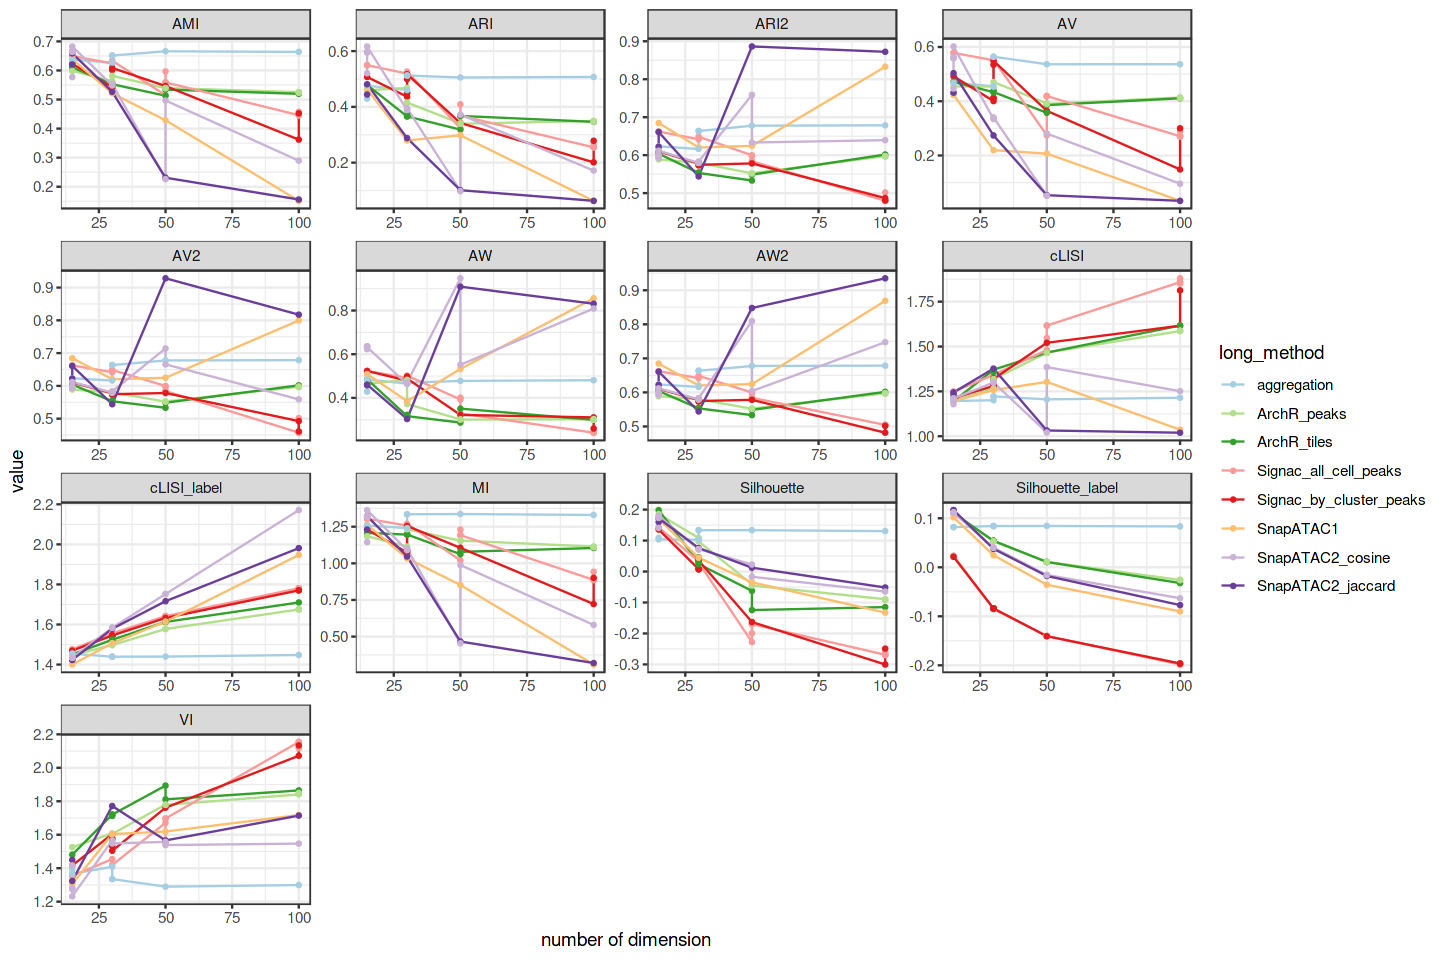

In [92]:
options(repr.plot.width=12, repr.plot.height=8)
p1 <-
df_metrics_optimal_k %>% 
  ggplot(aes(x=ndim, y=value, color=long_method)) + 
  geom_line(size=0.5) + 
  geom_point(size=0.8) +
  facet_wrap(~metric, scales = "free") + 
  xlab("number of dimension") +
  ylab("value") +
  # geom_vline(xintercept=0.8, linetype="dashed", color = "grey") +
  theme_bw() +
  scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])
p1

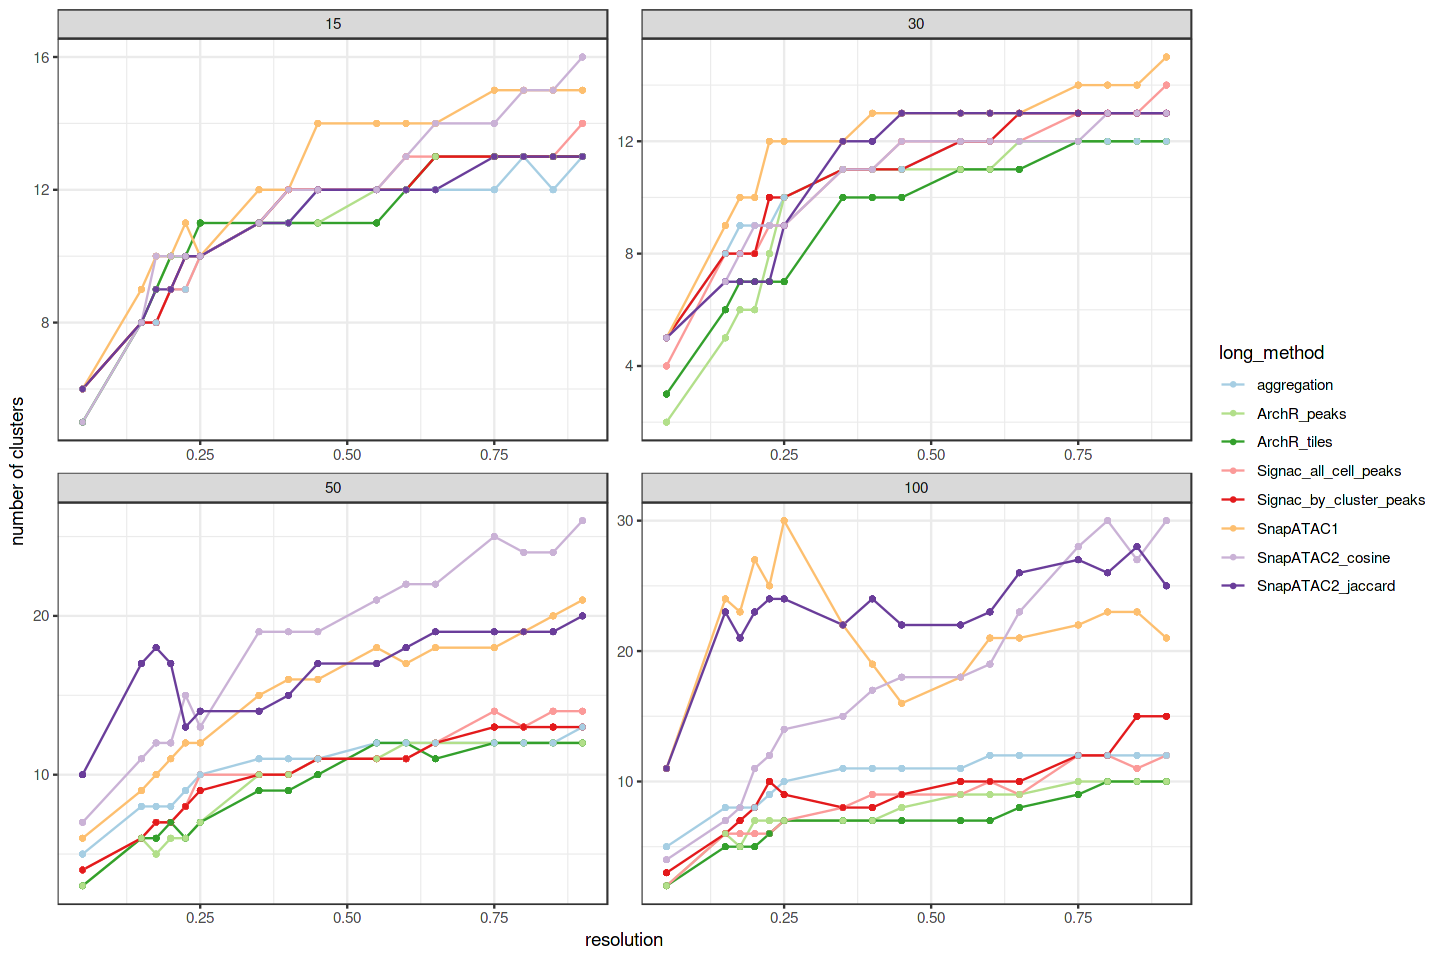

In [93]:
options(repr.plot.width=12, repr.plot.height=8)
p2 <- df_metrics %>% 
# filter(grepl(n,ndim)) %>% 
  ggplot(aes(x=resolution, y=n_clusters, color=long_method)) + 
  geom_line(size=0.5) + 
  geom_point(size=0.8) +
  facet_wrap(~ndim, scales = "free") + 
  xlab("resolution") +
  ylab("number of clusters") +
  # geom_vline(xintercept=0.8, linetype="dashed", color = "grey") +
  theme_bw() +
  scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) 
  # +
  # ylim(0, 25)
p2

### Use ARI, ARI2 only

In [94]:
df_metrics_external <- df_metrics[as.logical(df_metrics$metric %in% c("ARI", "AW", "AV", "AMI", "MI", "VI", "ARI2", "AW2", 'AV2')),]

In [95]:
df_metrics_ari <- df_metrics_external %>% filter(metric == "ARI" | metric == "ARI2") %>% mutate(group = paste(metric, ndim, sep="-"))
df_metrics_ari$group <- factor(df_metrics_ari$group, levels = c("ARI-15", "ARI-30", "ARI-50","ARI-100","ARI2-15","ARI2-30","ARI2-50","ARI2-100"))

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


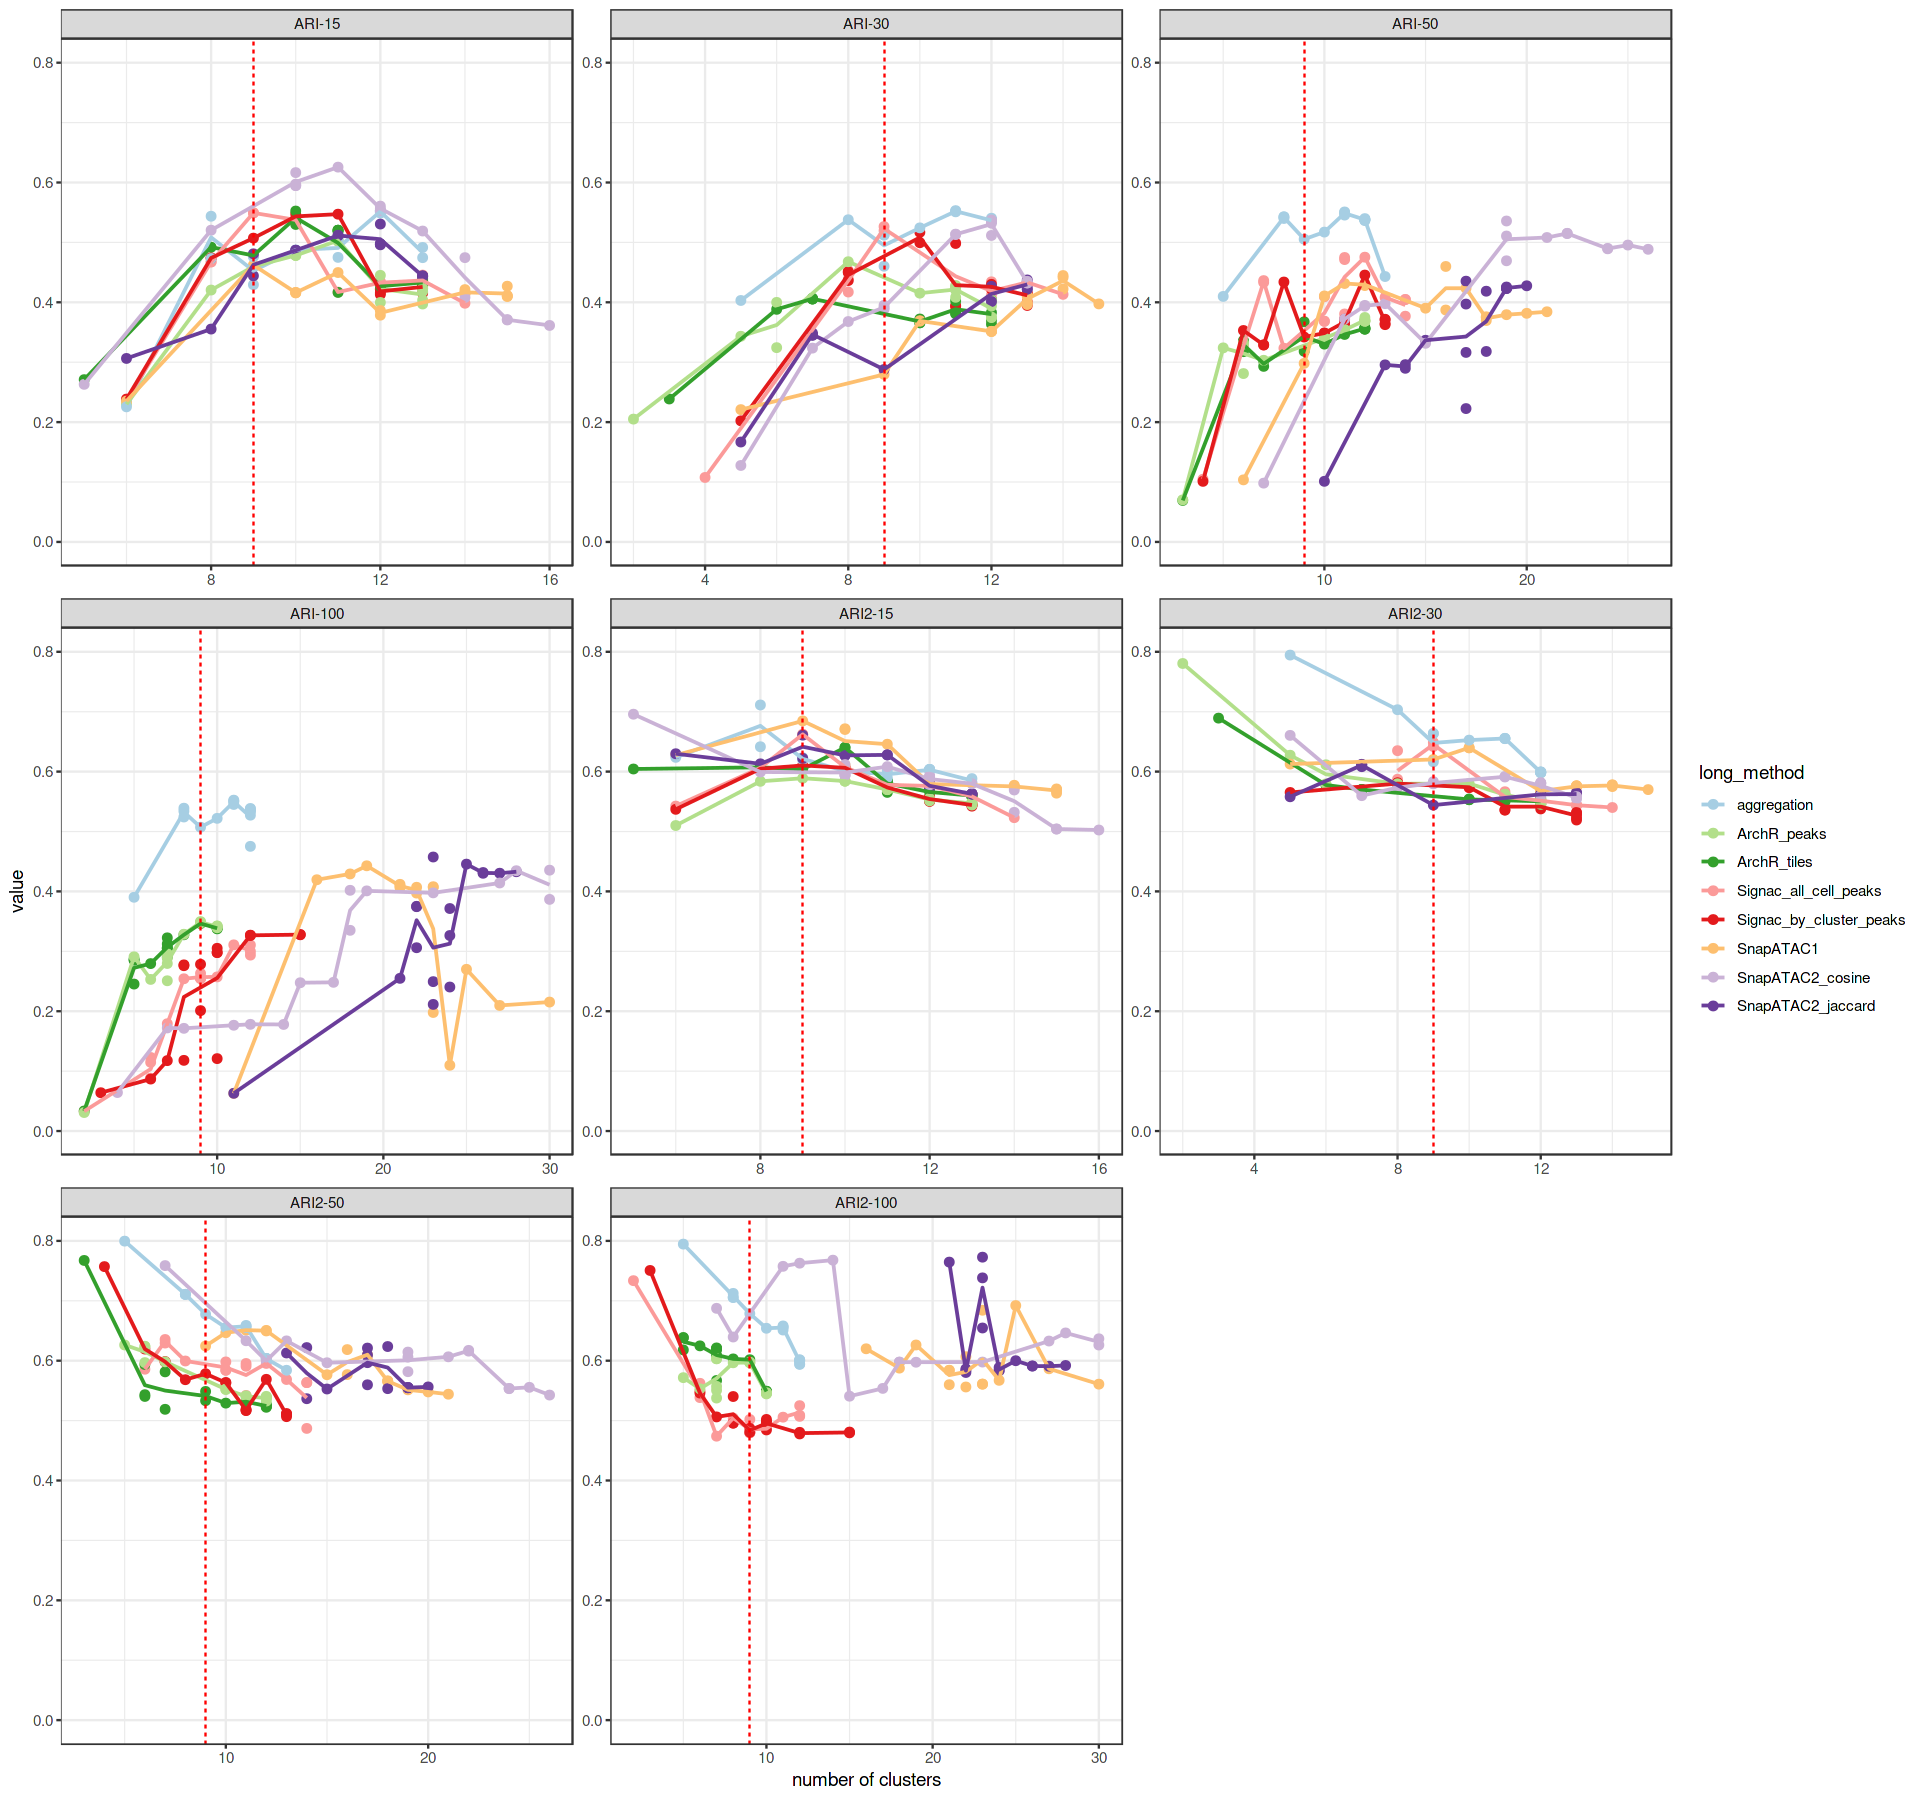

In [96]:
options(repr.plot.width=16, repr.plot.height=15)


# line plot (fix ndim=50)
p3 <-
df_metrics_ari %>% filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(long_method, metric, n_clusters, ndim) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=2) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~group, scales = "free") + 
  xlab("number of clusters") +
  ylab("value") +
  geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) + ylim(0, 0.8)
p3

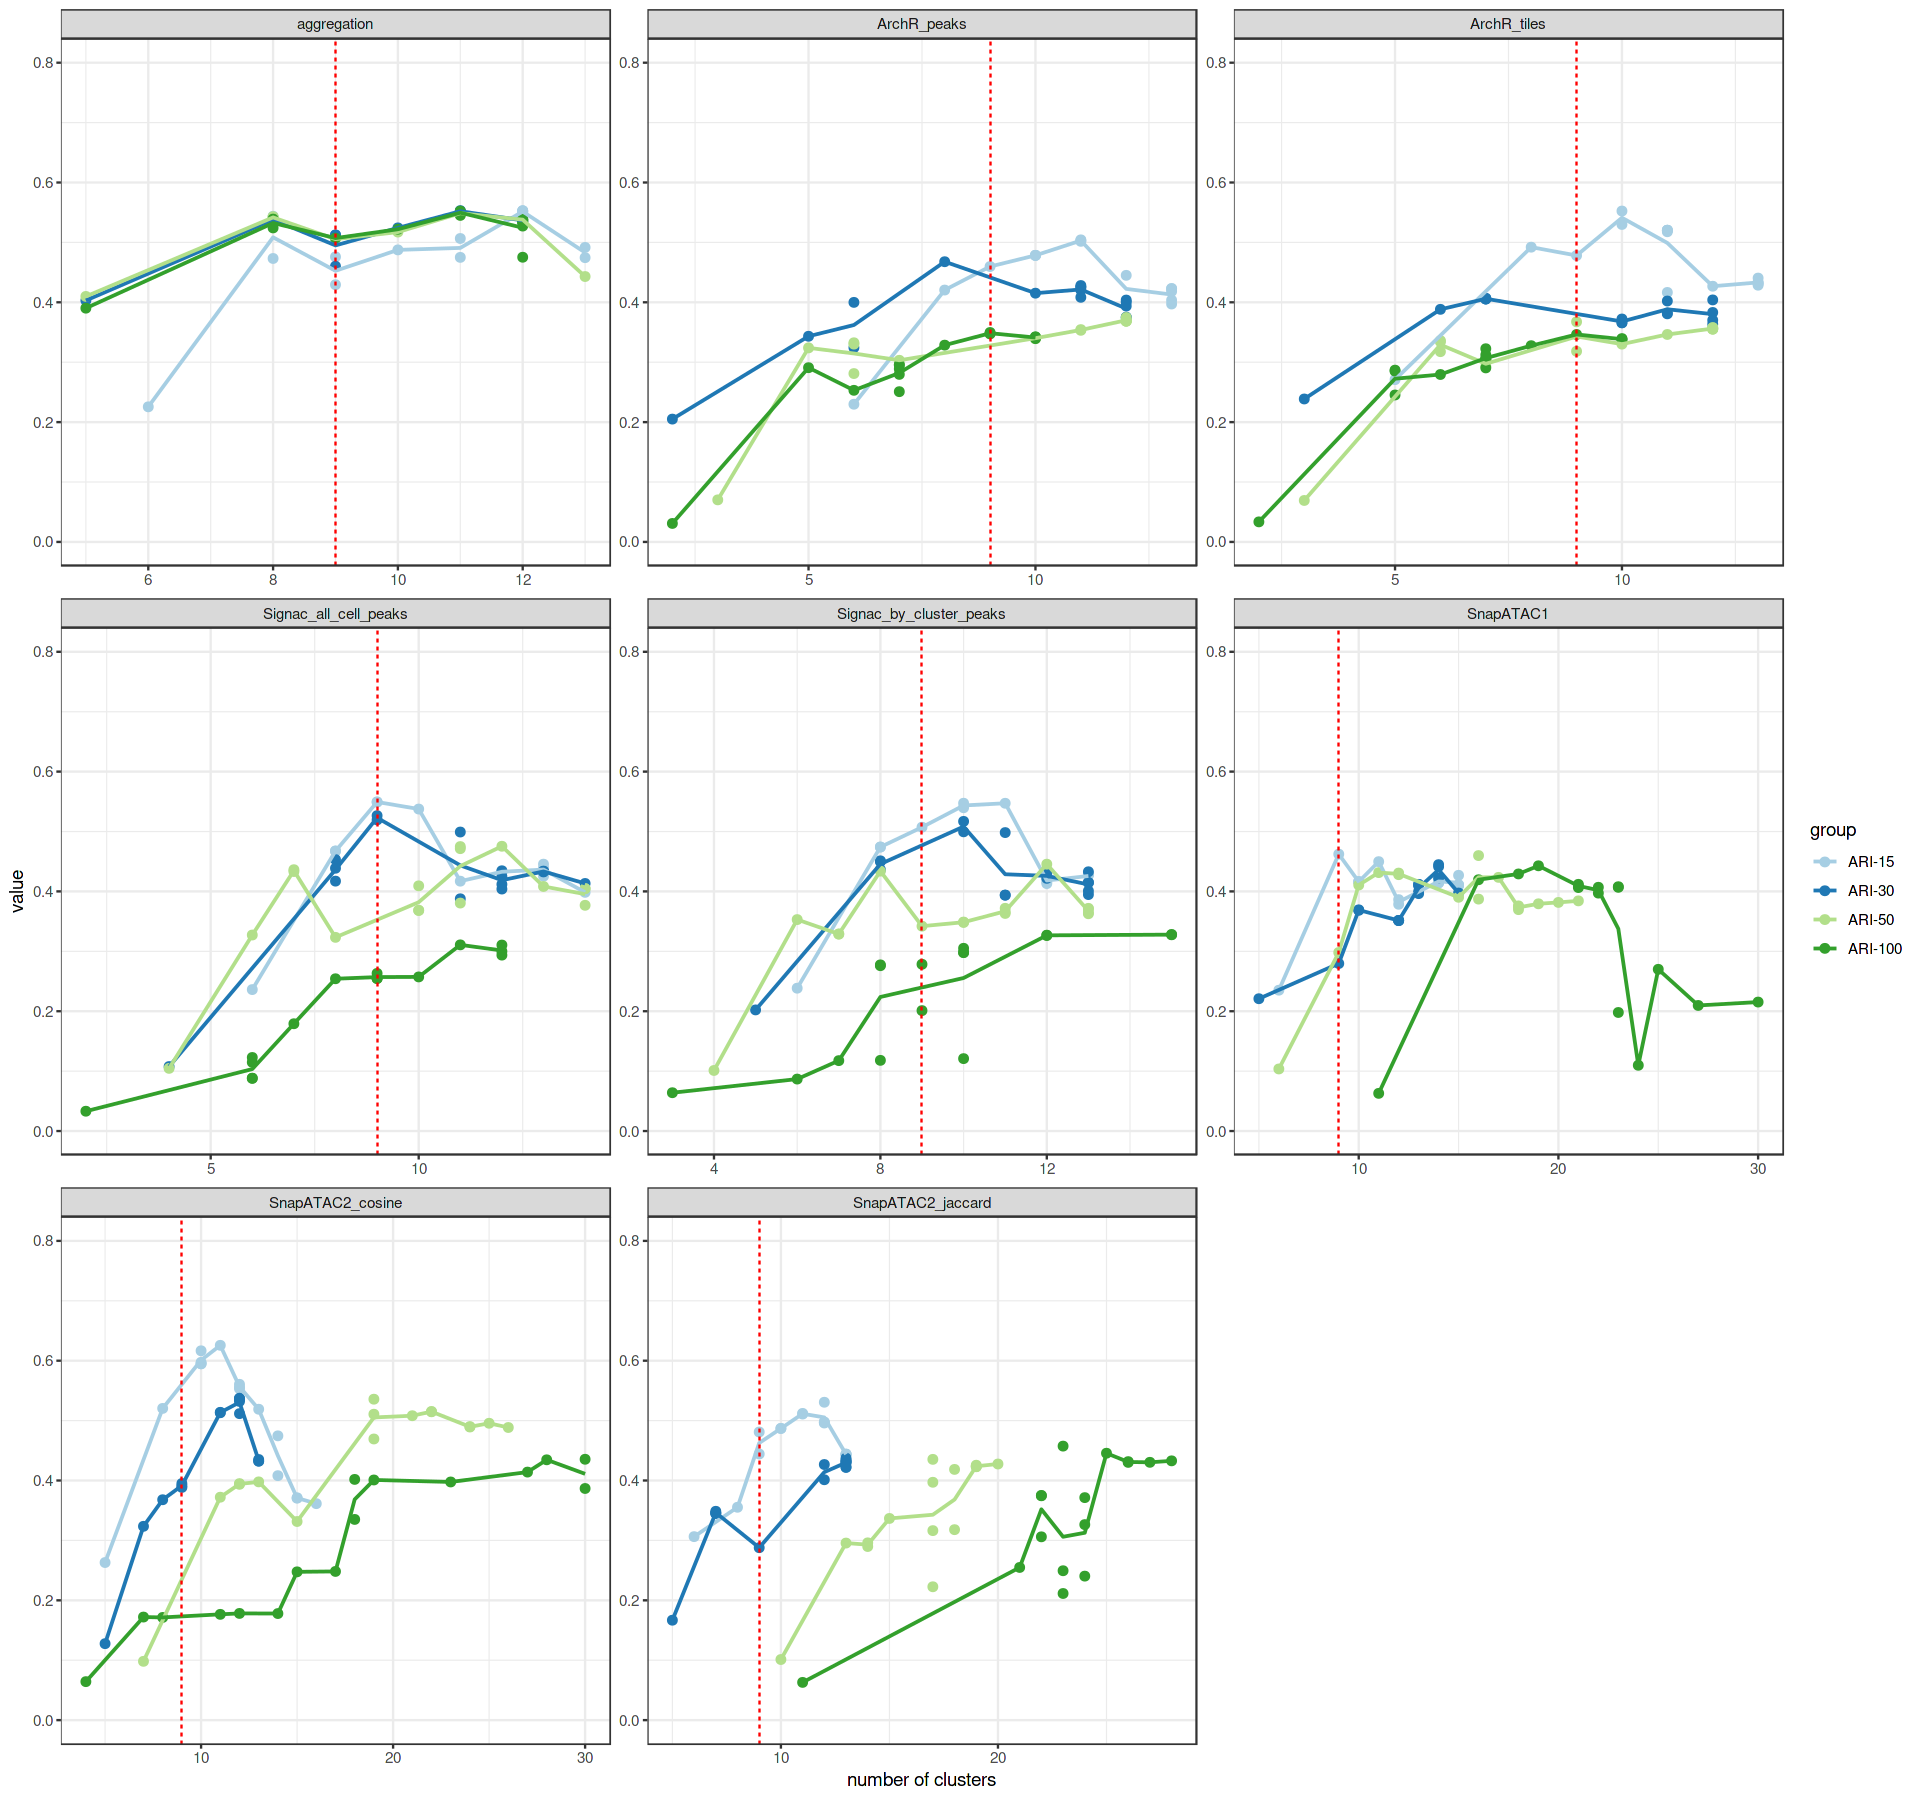

In [97]:
options(repr.plot.width=16, repr.plot.height=15)


# line plot (fix ndim=50)
p4 <-
df_metrics_ari %>% filter(n_clusters <= 30) %>% filter(metric=="ARI") %>% #filter(grepl(n,ndim)) %>%
  group_by(long_method, metric, n_clusters, ndim) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=group)) + 
  geom_point(size=2) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=group)) + 
  facet_wrap(~long_method, scales = "free") + 
  xlab("number of clusters") +
  ylab("value") +
  geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = brewer.pal(10, "Paired")) + ylim(0, 0.8)
p4

# For all datasets, get the above 4 plots

In [5]:
get_df <- function(dataset){
    df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metric_file.tsv"), sep="\t", header=TRUE)
    setwd(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset))

    df$rds_file <- gsub("_metrics.tsv", "_evaluation.RDS", df$file)
    df["clustering_file"] <- gsub("evaluation", "clustering", df$file)
    df["clustering_file"] <- gsub("_metrics", "", df$clustering_file)
    df["long_method"] <- paste(df$method, df$feature_type, df$distance, sep="_")
    df$long_method <-gsub("_default","",as.character(df$long_method))
    df$snn_file <- paste0(dirname(df$clustering_file), "/sobj_SNN.RDS")

    df$n_clusters <- 0
    for (i in 1:length(df$clustering_file)){
        clusterings <- read.table(df$clustering_file[i])
        df[i, "n_clusters"] <- max(clusterings$clusterings)
    }
    df_metrics <- data.frame(matrix(ncol = 13, nrow = 0))
    colnames(df_metrics) <- c("n_clusters","metric","value","method",
                            "long_method","feature_type","tile_size",
                            "distance","ndim","resolution","rds_file", 
                            "clustering_file", "snn_file")

    j <- 1
    for(i in 1:dim(df)[1]){
        file <- df$file[i]
        df_metric <- read.table(df$file[i], sep="\t", header=TRUE)
        for(metric in rownames(df_metric)){
            df_metrics[j, "metric"] <- metric
            df_metrics[j, "value"] <- df_metric[metric, "value"]
            df_metrics[j ,c("n_clusters","method","feature_type","tile_size","distance","ndim","resolution", 
                            "long_method", "rds_file", "clustering_file", "snn_file")] <- df[i, c("n_clusters","method","feature_type",
                                                                                                "tile_size","distance","ndim","resolution",
                                                                                                "long_method", "rds_file", "clustering_file", 
                                                                                                "snn_file")]
            j <- j+1
        }
    }

    df_metrics$resolution <- as.numeric(df_metrics$resolution)
    return(list(df=df, df_metrics=df_metrics))
}

In [6]:
add_ari2 <- function(df, df_metrics, true_labels=NULL){
    df_ari2 <- df_metrics[df_metrics$metric=="ARI",]
    df_ari2$metric <- "ARI2"
    df_aw2 <- df_metrics[df_metrics$metric=="ARI",]
    df_aw2$metric <- "AW2"
    df_av2 <- df_metrics[df_metrics$metric=="ARI",]
    df_av2$metric <- "AV2"


    for (i in 1:dim(df)[1]) {
        clustering_file <- df[i, "clustering_file"]
        df_clustering <-  read.table(file = clustering_file, sep = "\t")
        rownames(df_clustering) <- df_clustering$barcode
        clustering <- df_clustering$clustering
        if (is.null(true_labels)){
            input <- df[i,"snn_file"]
            sobj <- readRDS(input)
            true_labels <- sobj$ground_truth
            clustering <- unlist(lapply(Cells(sobj), function(x){df_clustering[x, "clusterings"]}))
        }
        res <- adjusted_wallance_indices(true_labels, clustering)
        awi <- res$Awi
        avj <- res$Avj
        aw2 <- mean(unlist(awi[!is.na(awi)]))
        av2 <- mean(unlist(awi[!is.na(avj)]))
        ari2 <- 2*aw2*av2/(aw2+av2)
        df_ari2[i, "value"] <- ari2
        df_aw2[i, "value"] <- aw2
        df_av2[i, "value"] <- av2
    }

    df_metrics <-  subset(df_metrics, metric != "ARI2")
    df_metrics <-  subset(df_metrics, metric != "AW2")
    df_metrics <-  subset(df_metrics, metric != "AV2")
    df_metrics <- rbind(df_metrics, df_ari2, df_aw2, df_av2)

    return(df_metrics)
}

In [7]:
ndim_visualize <- function(dataset, df_metrics, k_optimal){
    df_metrics$n_clusters_d <- abs(df_metrics$n_clusters - k_optimal)
    df_metrics_optimal_k <- df_metrics  %>%
    group_by(long_method, ndim) %>%
    filter(n_clusters_d == min(n_clusters_d))  %>%
    ungroup()

    options(repr.plot.width=12, repr.plot.height=8)
    p1 <-
    df_metrics_optimal_k %>% 
    group_by(long_method, metric, ndim) %>%
    mutate(mean_value = mean(value)) %>%
    ggplot(aes(x=ndim, y=value, color=long_method)) + 
    geom_point(size=0.8) +
    geom_line(size=0.5, aes(x=ndim, y=mean_value, color=long_method)) + 
    facet_wrap(~metric, scales = "free") + 
    xlab("number of dimension") +
    ylab("value") +
    # geom_vline(xintercept=0.8, linetype="dashed", color = "grey") +
    theme_bw() +
    scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])

    options(repr.plot.width=12, repr.plot.height=8)
    p2 <- df_metrics %>% 
    ggplot(aes(x=resolution, y=n_clusters, color=long_method)) + 
    geom_line(size=0.5) + 
    geom_point(size=0.8) +
    facet_wrap(~ndim, scales = "free") + 
    xlab("resolution") +
    ylab("number of clusters") +
    theme_bw() +
    scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) 


    df_metrics_ari <- df_metrics %>% filter(metric == "ARI" | metric == "ARI2") %>% mutate(group = paste(metric, ndim, sep="-"))
    df_metrics_ari$group <- factor(df_metrics_ari$group, levels = c("ARI-15", "ARI-30", "ARI-50","ARI-100","ARI2-15","ARI2-30","ARI2-50","ARI2-100"))

    options(repr.plot.width=16, repr.plot.height=15)

    p3 <-
    df_metrics_ari %>% filter(n_clusters <= 30) %>% 
    group_by(long_method, metric, n_clusters, ndim) %>%
    mutate(mean_value = mean(value)) %>%
    ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
    geom_point(size=2) +
    geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=long_method)) + 
    facet_wrap(~group, scales = "free") + 
    xlab("number of clusters") +
    ylab("value") +
    geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
    theme_bw() +
    scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) #+ ylim(0, 0.8)

    options(repr.plot.width=16, repr.plot.height=15)

    p4 <-
    df_metrics_ari %>% filter(n_clusters <= 30) %>% filter(metric=="ARI") %>% #filter(grepl(n,ndim)) %>%
    group_by(long_method, metric, n_clusters, ndim) %>%
    mutate(mean_value = mean(value)) %>%
    ggplot(aes(x=n_clusters, y=value, color=group)) + 
    geom_point(size=2) +
    geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=group)) + 
    facet_wrap(~long_method, scales = "free") + 
    xlab("number of clusters") +
    ylab("value") +
    geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
    theme_bw() +
    # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
    scale_colour_manual(values = brewer.pal(10, "Paired")) #+ ylim(0, 0.8)

    pdf(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/ndim_", dataset, ".pdf"), width=12, height=8)
    print(p1)
    print(p2)
    print(p3)
    print(p4)
    graphics.off()
}


In [11]:
dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics") #"Ma_2019",
k_ls <- c(9, 13, 10, 13, 15)

In [ ]:
# for(i in c(2,3,5)){
#     dataset <- dataset_ls[i]
#     k_optimal <- k_ls[i]
#     print(dataset)
#     ls <- get_df(dataset)
#     df <- ls$df
#     df_metrics <- ls$df_metrics
#     print(k_optimal)
#     df_metrics <- add_ari2(df, df_metrics)
#     print(3)
#     write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
#     write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)
#     ndim_visualize(dataset, df_metrics, k_optimal)
# }

[1] "candidate1"
[1] 13


Loading required package: Signac



## Buenrostro_2018

In [29]:
i <- 1
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [12]:
print(dataset)
ls <- get_df(dataset)
df <- ls$df
df_metrics <- ls$df_metrics
print(k_optimal)

[1] "Buenrostro_2018"
[1] 9


In [13]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [14]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

In [15]:
ndim_visualize(dataset, df_metrics, k_optimal)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Check why the performance of agg drop so much between two different run

The performance of using 30 vs 100 dimensions are identical. So the difference is due to the large randomness of the agg method.

In [30]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset))

In [31]:
embedding_file <- "feature_engineering/R/aggregation/default/500/default/archive/30.tsv"
sobj <- readRDS("clustering/aggregation/default/500/default/30/sobj_SNN.RDS")
sobj <- add_embedding(sobj, embedding_file, embed_name="test_30", max_dim=30)
sobj <- add_embedding(sobj, embedding_file, embed_name="test_100", max_dim=100)

Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”
Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:100'”


In [32]:
embed_ls <- c("test_30", "test_100")
r_ls <- c(0.05, 0.1, 0.15, 0.175, 0.2, 0.225, 0.25, 0.3,0.4,0.5)
for(embed_name in embed_ls){
    name1 <- paste0("nn_", embed_name)
    name2 <- paste0("snn_", embed_name)
    sobj <- FindNeighbors(object = sobj, 
                            reduction = embed_name, 
                            graph.name = c(name1, name2)
                        )
    sobj@graphs[[name1]] <- as.Graph(sobj@graphs[[name1]])
    sobj@graphs[[name2]] <- as.Graph(sobj@graphs[[name2]])
    ndim0 <- dim(sobj@reductions[[embed_name]])[2]
    sobj <- RunUMAP(sobj, 
            reduction = embed_name,
            dims = 1:ndim0,
            reduction.name=paste0("umap_" ,embed_name))
    for(r in r_ls){
        sobj <- FindClusters(object = sobj, 
                    verbose = FALSE, 
                    algorithm = 4,
                    resolution = r,
                    graph.name = name2
                    )
        sobj@meta.data[[paste0("clustering_" ,embed_name, "_r", r)]] <- sobj$seurat_clusters
    }
}

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:06:00 UMAP embedding parameters a = 0.9922 b = 1.112

11:06:00 Read 1715 rows and found 30 numeric columns

11:06:00 Using Annoy for neighbor search, n_neighbors = 30

11:06:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:06:00 Writing NN index file to temp file /media/siluo/c55ed6ce-672c-4a68-b60e-cef07edf5933/scratch/RtmprzE2Vq/fileffd4c1fdc9240

11:06:00 Searching Annoy index using 1 thread, search_k = 3000

11:06:00 Annoy recal

In [33]:
df <- data.frame(ARI=c(), resolution=c(), method=c(), n_cluster=c())
for(embed_name in embed_ls){
    for(r in r_ls){
    pred <- sobj@meta.data[[paste0("clustering_" ,embed_name, "_r", r)]]
    ari <- aricode::ARI(sobj$ground_truth, pred)
    # print(embed_name)
    # print(ari)
    # print(max(as.numeric(unique(pred))))
    df <- rbind(df, list(ARI=ari, resolution=r, method=embed_name, n_cluster=max(as.numeric(unique(pred)))))
    }   
}

In [36]:
df

ARI,resolution,method,n_cluster
<dbl>,<dbl>,<chr>,<dbl>
0.4150167,0.050,test_30,5
0.5452408,0.100,test_30,7
0.6752045,0.150,test_30,9
0.6752045,0.175,test_30,9
0.4903475,0.200,test_30,10
0.6918607,0.225,test_30,10
0.6897254,0.250,test_30,10
0.5511303,0.300,test_30,11
0.5315021,0.400,test_30,12


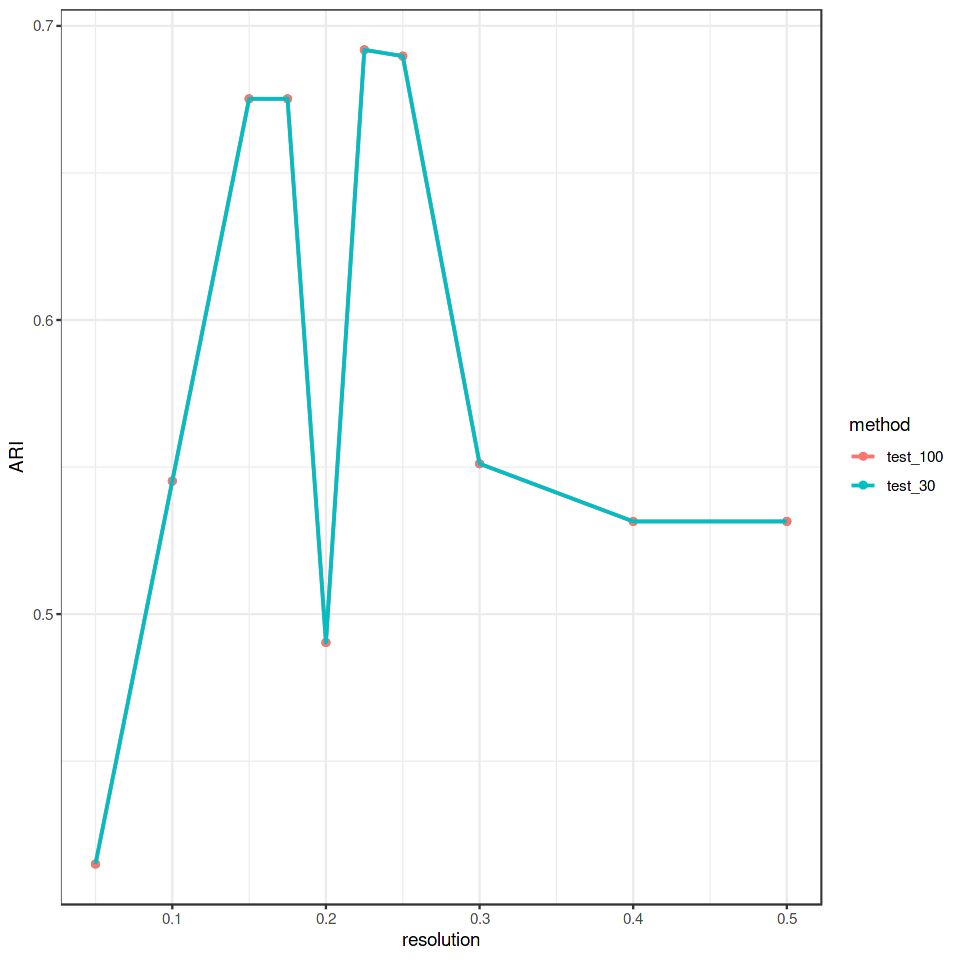

In [38]:
options(repr.plot.width=8, repr.plot.height=8)

df %>% 
  ggplot(aes(x=resolution, y=ARI, color=method)) + 
  geom_point(size=1.5) +
  geom_line(size=0.8, aes(x=resolution, y=ARI, color=method)) + 
  xlab("resolution") +
  ylab("ARI") +
#   geom_vline(xintercept=15, color = "red", linetype = "dashed") +
  theme_bw() #+
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
#   scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])

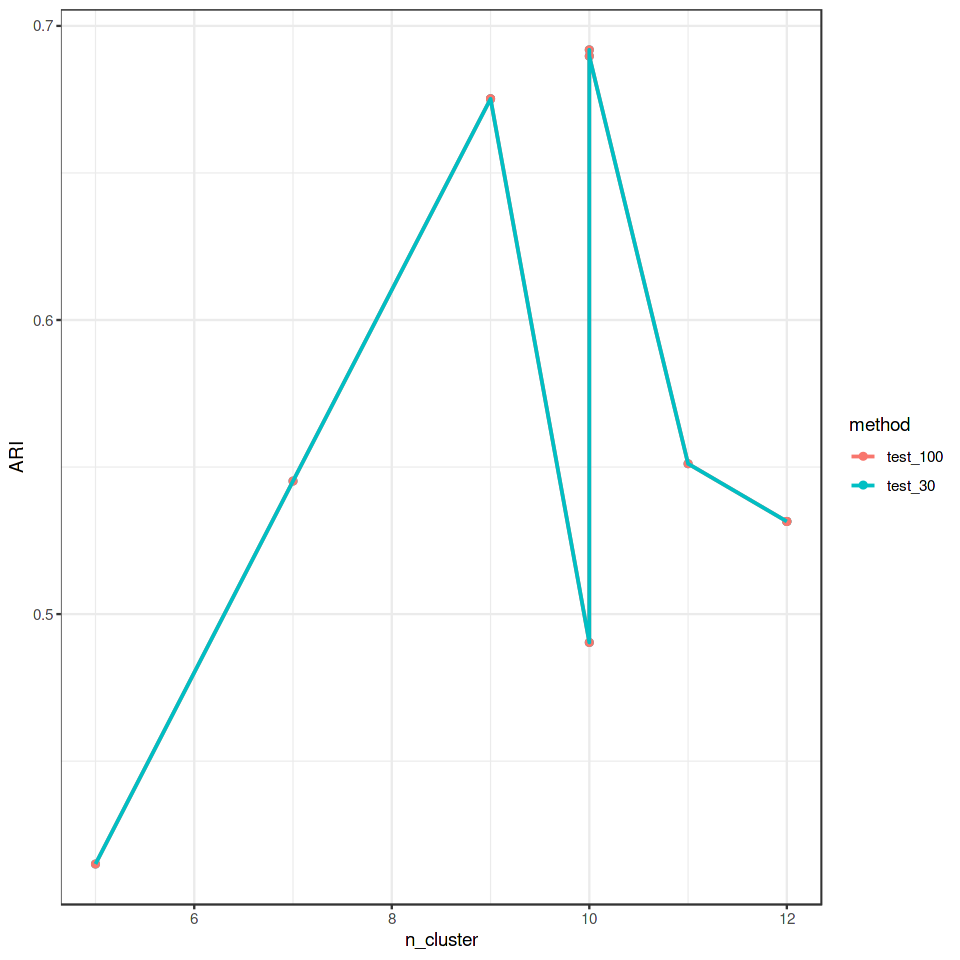

In [35]:
options(repr.plot.width=8, repr.plot.height=8)

df %>% 
  ggplot(aes(x=n_cluster, y=ARI, color=method)) + 
  geom_point(size=1.5) +
  geom_line(size=0.8, aes(x=n_cluster, y=ARI, color=method)) + 
  xlab("n_cluster") +
  ylab("ARI") +
#   geom_vline(xintercept=15, color = "red", linetype = "dashed") +
  theme_bw() #+
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
#   scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])

## candidate1

In [5]:
i <- 2
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [10]:

print(dataset)
ls <- get_df(dataset)
df <- ls$df
df_metrics <- ls$df_metrics
print(k_optimal)

[1] "candidate1"
[1] 13


In [11]:
input <- "candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS"
sobj <- readRDS(input)
true_labels <- sobj$ground_truth
# df_metrics <- add_ari2(df, df_metrics, true_labels)

Loading required package: Signac



In [12]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [13]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

In [14]:
ndim_visualize(dataset, df_metrics, k_optimal)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


## Chen_2019

In [16]:
i <- 4
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [18]:
print(dataset)
ls <- get_df(dataset)
df <- ls$df
df_metrics <- ls$df_metrics
print(k_optimal)

[1] "Chen_2019"
[1] 13


In [19]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [20]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

In [21]:
ndim_visualize(dataset, df_metrics, k_optimal)

## Cell_line_mixing

In [12]:
i <- 3
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [13]:
print(dataset)
ls <- get_df(dataset)
df <- ls$df
df_metrics <- ls$df_metrics
print(k_optimal)

[1] "Cell_line_mixing"
[1] 10


In [16]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [25]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

In [17]:
ndim_visualize(dataset, df_metrics, k_optimal)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


## PBMC

In [ ]:
i <- 5
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [ ]:
print(dataset)
ls <- get_df(dataset)
df <- ls$df
df_metrics <- ls$df_metrics
print(k_optimal)

[1] "PBMC_multiomics"
[1] 15


In [ ]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [ ]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

In [ ]:
ndim_visualize(dataset, df_metrics, k_optimal)

## candidate2

In [8]:
i <- 6
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [9]:
print(dataset)
ls <- get_df(dataset)
df <- ls$df
df_metrics <- ls$df_metrics
print(k_optimal)

[1] "candidate2"
[1] 10


In [10]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [11]:
setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

In [12]:
ndim_visualize(dataset, df_metrics, k_optimal)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


# Unsupervised exploration

Read the sobj of ndim=100, and check the weights/variance explained

## Elbow approach

In [17]:
find_elbow <- function(v, saturation=0.01){
    accum_gap <- 0
    for(i in 1:(length(v)-1)){
        gap <- v[i] - v[i+1]
        accum_gap <- accum_gap + gap
        if(gap < saturation * accum_gap){
            return(i)
        }
    }
}

### Candidate1

In [9]:
dataset <- "candidate1"

In [36]:
signac <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.RDS")
archr <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/ArchR/peaks/500/default/100.RDS")
snapatac1 <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/SnapATAC1/default/5000/default/100.RDS")
agg <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/aggregation/default/0/default/100.RDS")

In [37]:
sce <- as.SingleCellExperiment(agg)
sce_x <- scDblFinder:::aggregateFeatures(
        sce,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn=Signac::RunTFIDF, 
        twoPass=TRUE)

agg_counts <- counts(sce_x)
# feature_groups <- metadata(sce_x)$featureGroups

        # create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)
pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Performing TF-IDF normalization

Second iteration...

Performing TF-IDF normalization



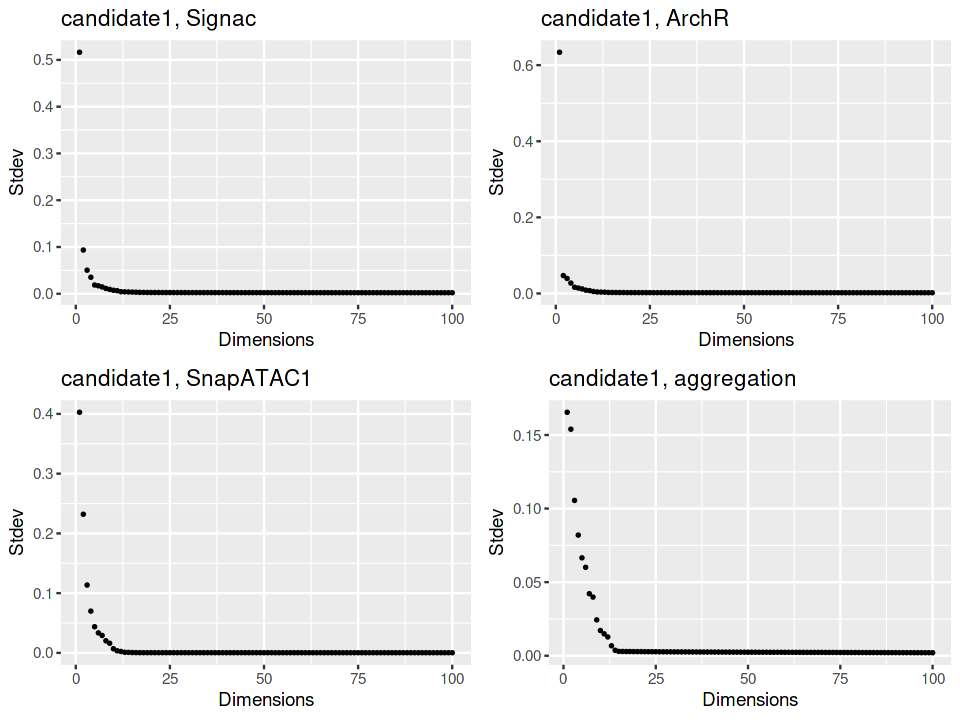

In [38]:
options(repr.plot.width=8, repr.plot.height=6)
y_signac <- signac@reductions$lsi_by_cluster_peaks@stdev
y_signac <- y_signac^2/sum(y_signac^2)
x <- 1:length(y_signac)
df <- data.frame(x, y_signac)
p1 <- ggplot(df, aes(x, y_signac)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, Signac")

y_archr <- archr@reducedDims@listData$IterativeLSI_peaks_ndim100$svd$d
y_archr <- y_archr^2/sum(y_archr^2)
x <- 1:length(y_archr)
df <- data.frame(x, y_archr)
p2 <- ggplot(df, aes(x, y_archr)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, ArchR")

y_snapatac1 <- snapatac1@smat@sdev
y_snapatac1 <- y_snapatac1^2/sum(y_snapatac1^2)
x <- 1:length(y_snapatac1)
df <- data.frame(x, y_snapatac1)
p3 <- ggplot(df, aes(x, y_snapatac1)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, SnapATAC1")

y_agg <- pca$sdev
y_agg <- y_agg^2/sum(y_agg^2)
x <- 1:length(y_agg)
df <- data.frame(x, y_agg)
p4 <- ggplot(df, aes(x, y_agg)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, aggregation")

grid.arrange(p1, p2, p3, p4, ncol=2)

In [39]:
sum(y_signac[1:15])
sum(y_archr[1:15])
sum(y_snapatac1[1:15])
sum(y_agg[1:15])

[1] 0.796487

[1] 0.8277862

[1] 0.9759498

[1] 0.7982044

In [40]:
saveRDS(list(y_signac=y_signac,y_archr=y_archr,y_snapatac1=y_snapatac1,y_agg=y_agg), file=paste0(dataset, "_stdev.RDS"))

In [10]:
dataset <- "candidate1"
ls <- readRDS(paste0(dataset, "_stdev.RDS"))
y_signac <- ls$y_signac
y_archr <- ls$y_archr
y_snapatac1 <- ls$y_snapatac1
y_agg <- ls$y_agg

In [18]:
find_elbow(y_signac[2:100])
find_elbow(y_archr[2:100])
find_elbow(y_snapatac1)
find_elbow(y_agg)

[1] 9

[1] 10

[1] 10

[1] 14

### Candidate2

In [13]:
dataset <- "candidate2"

In [14]:
signac <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.RDS")
archr <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/ArchR/peaks/500/default/100.RDS")
snapatac1 <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/SnapATAC1/default/5000/default/100.RDS")
agg <- readRDS("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/aggregation/default/0/default/100.RDS")

In [15]:
sce <- as.SingleCellExperiment(agg)
sce_x <- scDblFinder:::aggregateFeatures(
        sce,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn=Signac::RunTFIDF, 
        twoPass=TRUE)

agg_counts <- counts(sce_x)
# feature_groups <- metadata(sce_x)$featureGroups

        # create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)
pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)

Loading required package: Signac

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Performing TF-IDF normalization

Second iteration...

Performing TF-IDF normalization



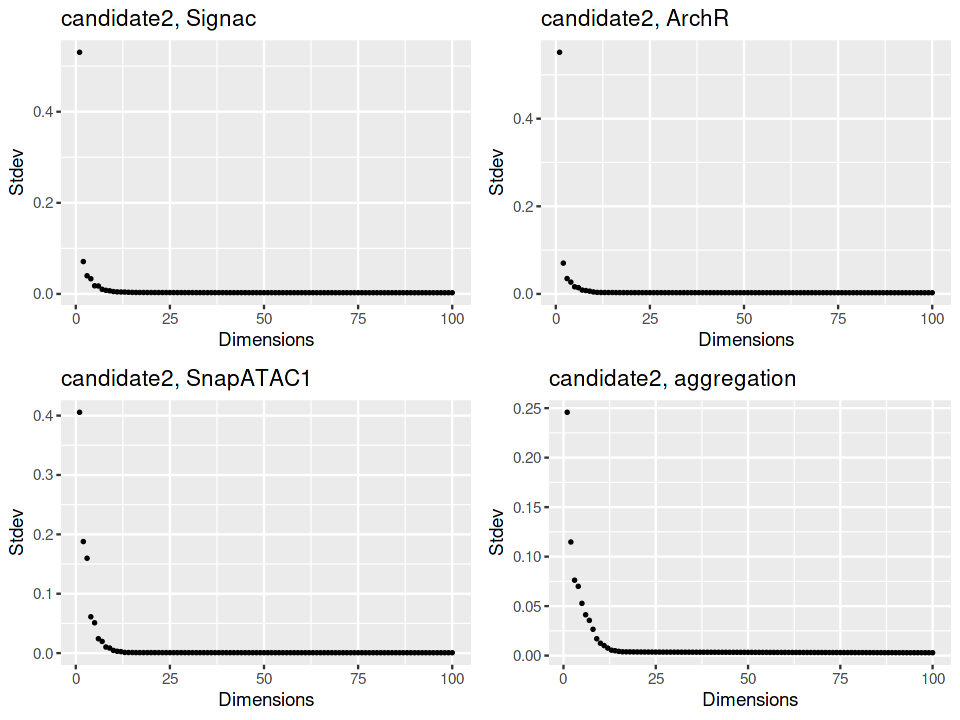

In [18]:
options(repr.plot.width=8, repr.plot.height=6)
y_signac <- signac@reductions$lsi_by_cluster_peaks@stdev
y_signac <- y_signac^2/sum(y_signac^2)
x <- 1:length(y_signac)
df <- data.frame(x, y_signac)
p1 <- ggplot(df, aes(x, y_signac)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate2, Signac")

y_archr <- archr@reducedDims@listData$IterativeLSI_peaks_ndim100$svd$d
y_archr <- y_archr^2/sum(y_archr^2)
x <- 1:length(y_archr)
df <- data.frame(x, y_archr)
p2 <- ggplot(df, aes(x, y_archr)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate2, ArchR")

y_snapatac1 <- snapatac1@smat@sdev
y_snapatac1 <- y_snapatac1^2/sum(y_snapatac1^2)
x <- 1:length(y_snapatac1)
df <- data.frame(x, y_snapatac1)
p3 <- ggplot(df, aes(x, y_snapatac1)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate2, SnapATAC1")

y_agg <- pca$sdev
y_agg <- y_agg^2/sum(y_agg^2)
x <- 1:length(y_agg)
df <- data.frame(x, y_agg)
p4 <- ggplot(df, aes(x, y_agg)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate2, aggregation")

grid.arrange(p1, p2, p3, p4, ncol=2)

In [19]:
sum(y_signac[1:15])
sum(y_archr[1:15])
sum(y_snapatac1[1:15])
sum(y_agg[1:15])

[1] 0.7601923

[1] 0.7579478

[1] 0.9410667

[1] 0.724811

In [20]:
saveRDS(list(y_signac=y_signac,y_archr=y_archr,y_snapatac1=y_snapatac1,y_agg=y_agg), file=paste0(dataset, "_stdev.RDS"))

In [ ]:
dataset <- "candidate2"
ls <- readRDS(paste0(dataset, "_stdev.RDS"))
y_signac <- ls$y_signac
y_archr <- ls$y_archr
y_snapatac1 <- ls$y_snapatac1
y_agg <- ls$y_agg

In [21]:
find_elbow(y_signac[2:100])
find_elbow(y_archr[2:100])
find_elbow(y_snapatac1)
find_elbow(y_agg)

[1] 4

[1] 10

[1] 8

[1] 12

### Buenrostro_2018

In [18]:
dataset <- "Buenrostro_2018"
signac <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.RDS"))
archr <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/ArchR/peaks/500/default/100.RDS"))
snapatac1 <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/SnapATAC1/default/5000/default/100.RDS"))
agg <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/aggregation/default/500/default/100.RDS"))


In [19]:
sce <- as.SingleCellExperiment(agg)
sce_x <- scDblFinder:::aggregateFeatures(
        sce,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn=Signac::RunTFIDF, 
        twoPass=TRUE)

agg_counts <- counts(sce_x)
# feature_groups <- metadata(sce_x)$featureGroups

        # create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)
pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Performing TF-IDF normalization



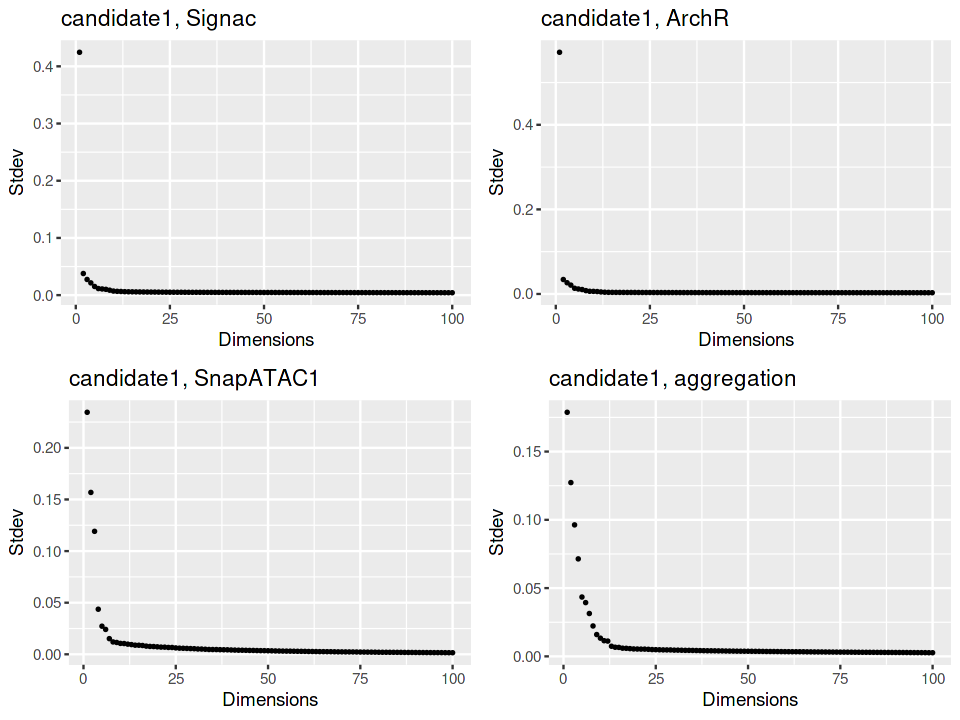

In [26]:
options(repr.plot.width=8, repr.plot.height=6)
y_signac <- signac@reductions$lsi_by_cluster_peaks@stdev
y_signac <- y_signac^2/sum(y_signac^2)
x <- 1:length(y_signac)
df <- data.frame(x, y_signac)
p1 <- ggplot(df, aes(x, y_signac)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, Signac")

y_archr <- archr@reducedDims@listData$IterativeLSI_peaks_ndim100$svd$d
y_archr <- y_archr^2/sum(y_archr^2)
x <- 1:length(y_archr)
df <- data.frame(x, y_archr)
p2 <- ggplot(df, aes(x, y_archr)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, ArchR")

y_snapatac1 <- snapatac1@smat@sdev
y_snapatac1 <- y_snapatac1^2/sum(y_snapatac1^2)
x <- 1:length(y_snapatac1)
df <- data.frame(x, y_snapatac1)
p3 <- ggplot(df, aes(x, y_snapatac1)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, SnapATAC1")

y_agg <- pca$sdev
y_agg <- y_agg^2/sum(y_agg^2)
x <- 1:length(y_agg)
df <- data.frame(x, y_agg)
p4 <- ggplot(df, aes(x, y_agg)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, aggregation")

grid.arrange(p1, p2, p3, p4, ncol=2)

In [27]:
saveRDS(list(y_signac=y_signac,y_archr=y_archr,y_snapatac1=y_snapatac1,y_agg=y_agg), file=paste0(dataset, "_stdev.RDS"))

In [28]:
sum(y_signac[1:15])
sum(y_archr[1:15])
sum(y_snapatac1[1:15])
sum(y_agg[1:15])

[1] 0.6053329

[1] 0.7315418

[1] 0.7020075

[1] 0.6829024

In [19]:
dataset <- "Buenrostro_2018"
ls <- readRDS(paste0(dataset, "_stdev.RDS"))
y_signac <- ls$y_signac
y_archr <- ls$y_archr
y_snapatac1 <- ls$y_snapatac1
y_agg <- ls$y_agg

In [20]:
find_elbow(y_signac[2:100])
find_elbow(y_archr[2:100])
find_elbow(y_snapatac1)
find_elbow(y_agg)

[1] 10

[1] 8

[1] 8

[1] 11

### Chen_2019

In [67]:
dataset <- "Chen_2019"
signac <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.RDS"))
archr <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/ArchR/peaks/500/default/100.RDS"))
snapatac1 <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/SnapATAC1/default/5000/default/100.RDS"))
agg <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/aggregation/default/500/default/100.RDS"))


In [42]:
sce <- as.SingleCellExperiment(agg)
sce_x <- scDblFinder:::aggregateFeatures(
        sce,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn=Signac::RunTFIDF, 
        twoPass=TRUE)

agg_counts <- counts(sce_x)
# feature_groups <- metadata(sce_x)$featureGroups

        # create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)
pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Performing TF-IDF normalization

Second iteration...

Performing TF-IDF normalization



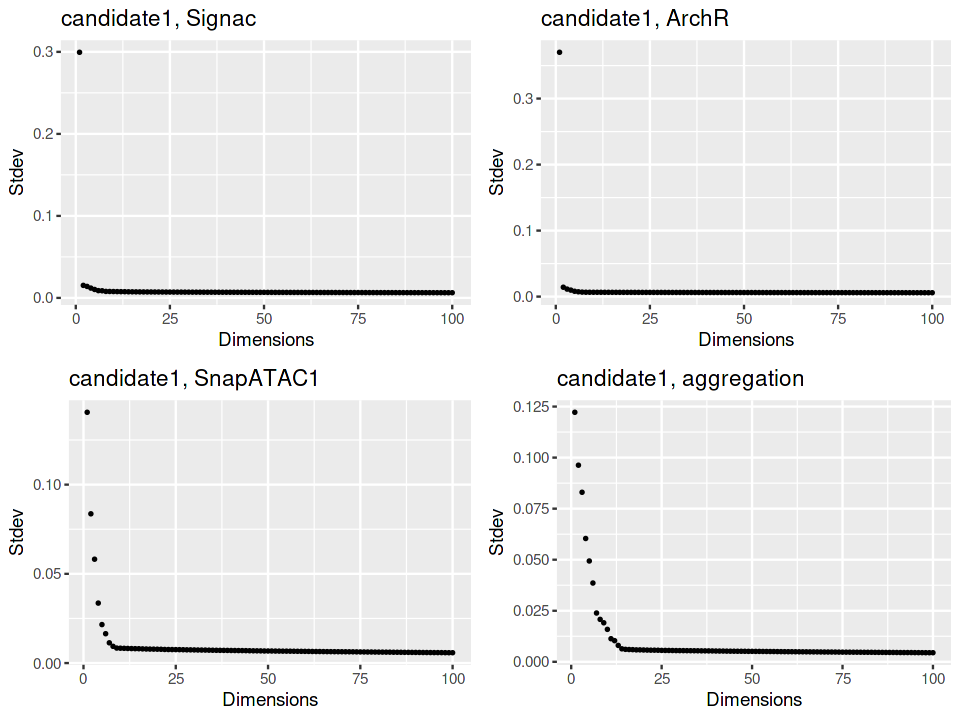

In [43]:
options(repr.plot.width=8, repr.plot.height=6)
y_signac <- signac@reductions$lsi_by_cluster_peaks@stdev
y_signac <- y_signac^2/sum(y_signac^2)
x <- 1:length(y_signac)
df <- data.frame(x, y_signac)
p1 <- ggplot(df, aes(x, y_signac)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, Signac")

y_archr <- archr@reducedDims@listData$IterativeLSI_peaks_ndim100$svd$d
y_archr <- y_archr^2/sum(y_archr^2)
x <- 1:length(y_archr)
df <- data.frame(x, y_archr)
p2 <- ggplot(df, aes(x, y_archr)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, ArchR")

y_snapatac1 <- snapatac1@smat@sdev
y_snapatac1 <- y_snapatac1^2/sum(y_snapatac1^2)
x <- 1:length(y_snapatac1)
df <- data.frame(x, y_snapatac1)
p3 <- ggplot(df, aes(x, y_snapatac1)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, SnapATAC1")

y_agg <- pca$sdev
y_agg <- y_agg^2/sum(y_agg^2)
x <- 1:length(y_agg)
df <- data.frame(x, y_agg)
p4 <- ggplot(df, aes(x, y_agg)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, aggregation")

grid.arrange(p1, p2, p3, p4, ncol=2)

In [44]:
saveRDS(list(y_signac=y_signac,y_archr=y_archr,y_snapatac1=y_snapatac1,y_agg=y_agg), file=paste0(dataset, "_stdev.RDS"))

In [53]:
sum(y_signac[1:15])/sum(y_signac[1:100])

[1] 0.2131801

In [51]:
sum(y_snapatac1[1:50])/sum(y_snapatac1[1:100])

[1] 0.5677265

In [54]:
sum(y_agg[1:100])

[1] 133.4644

In [52]:
sum(y_agg[1:50])/sum(y_agg[1:100])

[1] 0.601956

In [21]:
dataset <- "Chen_2019"
ls <- readRDS(paste0(dataset, "_stdev.RDS"))
y_signac <- ls$y_signac
y_archr <- ls$y_archr
y_snapatac1 <- ls$y_snapatac1
y_agg <- ls$y_agg

In [22]:
find_elbow(y_signac[2:100])
find_elbow(y_archr[2:100])
find_elbow(y_snapatac1)
find_elbow(y_agg)

[1] 7

[1] 7

[1] 8

[1] 11

### Cell_line_mixing

In [18]:
dataset <- "Cell_line_mixing"
signac <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.RDS"))
archr <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/ArchR/peaks/500/default/100.RDS"))
snapatac1 <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/SnapATAC1/default/5000/default/100.RDS"))
agg <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/feature_engineering/R/aggregation/default/500/default/100.RDS"))


In [19]:
sce <- as.SingleCellExperiment(agg)
sce_x <- scDblFinder:::aggregateFeatures(
        sce,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn=Signac::RunTFIDF, 
        twoPass=TRUE)

agg_counts <- counts(sce_x)
# feature_groups <- metadata(sce_x)$featureGroups

        # create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)
pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)

Loading required package: Signac

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Performing TF-IDF normalization

Second iteration...

Performing TF-IDF normalization



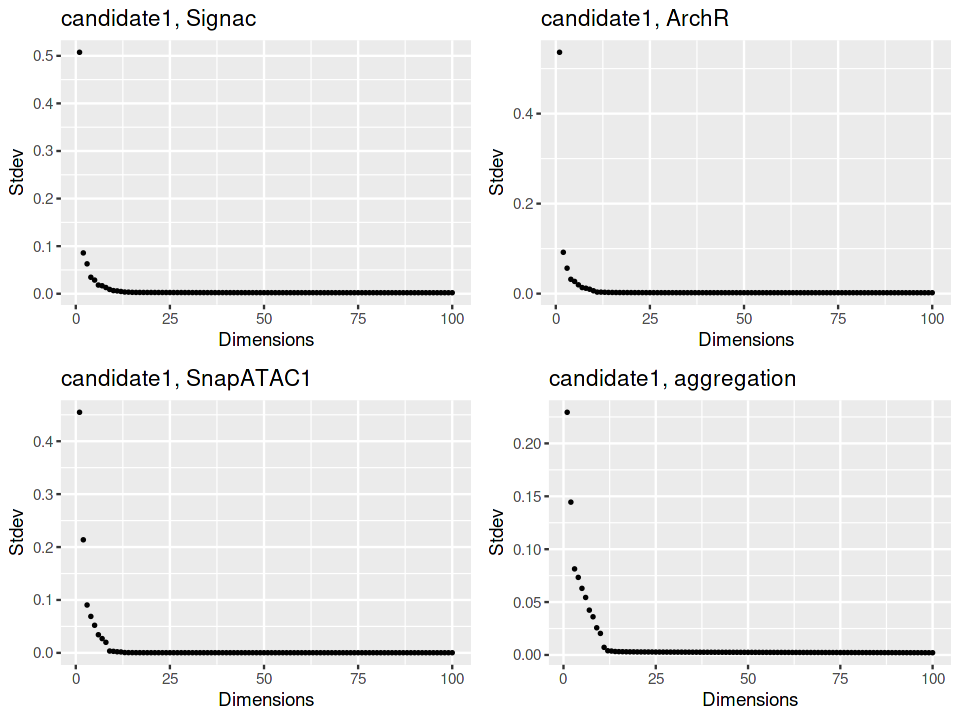

In [20]:
options(repr.plot.width=8, repr.plot.height=6)
y_signac <- signac@reductions$lsi_by_cluster_peaks@stdev
y_signac <- y_signac^2/sum(y_signac^2)
x <- 1:length(y_signac)
df <- data.frame(x, y_signac)
p1 <- ggplot(df, aes(x, y_signac)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, Signac")

y_archr <- archr@reducedDims@listData$IterativeLSI_peaks_ndim100$svd$d
y_archr <- y_archr^2/sum(y_archr^2)
x <- 1:length(y_archr)
df <- data.frame(x, y_archr)
p2 <- ggplot(df, aes(x, y_archr)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, ArchR")

y_snapatac1 <- snapatac1@smat@sdev
y_snapatac1 <- y_snapatac1^2/sum(y_snapatac1^2)
x <- 1:length(y_snapatac1)
df <- data.frame(x, y_snapatac1)
p3 <- ggplot(df, aes(x, y_snapatac1)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, SnapATAC1")

y_agg <- pca$sdev
y_agg <- y_agg^2/sum(y_agg^2)
x <- 1:length(y_agg)
df <- data.frame(x, y_agg)
p4 <- ggplot(df, aes(x, y_agg)) +
geom_point(size=0.5) + 
labs(x = "Dimensions", y = "Stdev", title = "candidate1, aggregation")

grid.arrange(p1, p2, p3, p4, ncol=2)

In [21]:
saveRDS(list(y_signac=y_signac,y_archr=y_archr,y_snapatac1=y_snapatac1,y_agg=y_agg), file=paste0(dataset, "_stdev.RDS"))

In [22]:
ls <- readRDS(paste0(dataset, "_stdev.RDS"))
y_signac <- ls$y_signac
y_archr <- ls$y_archr
y_snapatac1 <- ls$y_snapatac1
y_agg <- ls$y_agg

In [25]:
find_elbow(y_signac[2:100])
find_elbow(y_archr[2:100])
find_elbow(y_snapatac1)
find_elbow(y_agg)

[1] 9

[1] 10

[1] 9

[1] 12

: 

## Jackstraw approach

# Correlation between latent variables and library size

## Buenrostro_2018

In [38]:
j <- 1
dataset <- dataset_ls[j]
k_optimal <- k_ls[j]
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)

In [34]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/15.RDS"))
feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix!
feature_matrix <- t(feature_matrix)
dim(feature_matrix)
counts <- Matrix::rowSums(feature_matrix)

[1]   1715 114218

In [10]:
getwd()

[1] "/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/ndim"

In [39]:
df <- df[,c("scenario","method", "feature_type", "tile_size", "distance", "ndim", "long_method")]
df <- subset(df, !duplicated(df))
df$language <- "R"
df[df$method == "SnapATAC2", "language"] <- "python"
# df[df$method=="aggregation", "tile_size"] <- 0
df$embed_file <- paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df$scenario, "/", df$scenario, "/feature_engineering/", df$language, "/", df$method, "/", df$feature_type, "/", df$tile_size, "/", df$distance, "/", df$ndim, ".tsv")

In [40]:
df <- df %>% filter(ndim == 100)
df

,scenario,method,feature_type,tile_size,distance,ndim,long_method,language,embed_file
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
61,Buenrostro_2018,Signac,by_cluster_peaks,0,default,100,Signac_by_cluster_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv
141,Buenrostro_2018,Signac,all_cell_peaks,0,default,100,Signac_all_cell_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/R/Signac/all_cell_peaks/0/default/100.tsv
221,Buenrostro_2018,ArchR,peaks,500,default,100,ArchR_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/R/ArchR/peaks/500/default/100.tsv
301,Buenrostro_2018,ArchR,tiles,500,default,100,ArchR_tiles,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/R/ArchR/tiles/500/default/100.tsv
381,Buenrostro_2018,SnapATAC1,default,5000,default,100,SnapATAC1,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv
461,Buenrostro_2018,aggregation,default,500,default,100,aggregation,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/R/aggregation/default/500/default/100.tsv
541,Buenrostro_2018,SnapATAC2,default,500,jaccard,100,SnapATAC2_jaccard,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv
621,Buenrostro_2018,SnapATAC2,default,500,cosine,100,SnapATAC2_cosine,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Buenrostro_2018/Buenrostro_2018/feature_engineering/python/SnapATAC2/default/500/cosine/100.tsv


In [47]:
for(i in 1:dim(df)[1]){
    embed_file <- df$embed_file[i]
    embed <- read.table(embed_file, sep="\t", comment.char = "", row.names = 1)
    long_method <- df$long_method[i]
    print(long_method)
    print(dim(embed)[2])
}

[1] "Signac_by_cluster_peaks"
[1] 99
[1] "Signac_all_cell_peaks"
[1] 99
[1] "ArchR_peaks"
[1] 99
[1] "ArchR_tiles"
[1] 99
[1] "SnapATAC1"
[1] 100
[1] "aggregation"
[1] 100
[1] "SnapATAC2_jaccard"
[1] 100
[1] "SnapATAC2_cosine"
[1] 100


In [ ]:
rownames(embed) <- gsub("CellinFile1+", "", rownames(embed), fixed=TRUE)
df_counts <- as.data.frame(counts)
df_merge <- merge(df_counts, embed, by = "row.names")
counts_sub <- df_merge$counts
df_merge <- df_merge[, -1]
df_merge <- df_merge[, -1]
dim(as.matrix(df_merge))
length(counts_sub)

In [72]:
head(as.data.frame(cor(x = as.matrix(df_merge), y = counts_sub)))

,V1
,<dbl>
V2,-0.14191674
V3,-0.10356701
V4,0.01641966
V5,0.01949346
V6,-0.05976559
V7,0.06325954


## candidate1

In [73]:
j <- 2
dataset <- dataset_ls[j]
k_optimal <- k_ls[j]
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
print(dataset)

[1] "candidate1"


In [74]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/15.RDS"))
feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix!
feature_matrix <- t(feature_matrix)
dim(feature_matrix)
counts <- Matrix::rowSums(feature_matrix)

[1]  20204 291614

In [75]:
df <- df[,c("scenario","method", "feature_type", "tile_size", "distance", "ndim", "long_method")]
df <- subset(df, !duplicated(df))
df$language <- "R"
df[df$method == "SnapATAC2", "language"] <- "python"
# df[df$method=="aggregation", "tile_size"] <- 0
df$embed_file <- paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df$scenario, "/", df$scenario, "/feature_engineering/", df$language, "/", df$method, "/", df$feature_type, "/", df$tile_size, "/", df$distance, "/", df$ndim, ".tsv")

In [76]:
df <- df %>% filter(ndim == 100)
df

,scenario,method,feature_type,tile_size,distance,ndim,long_method,language,embed_file
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
46,candidate1,Signac,all_cell_peaks,0,default,100,Signac_all_cell_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/Signac/all_cell_peaks/0/default/100.tsv
106,candidate1,Signac,by_cluster_peaks,0,default,100,Signac_by_cluster_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv
166,candidate1,ArchR,peaks,500,default,100,ArchR_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/ArchR/peaks/500/default/100.tsv
226,candidate1,ArchR,tiles,500,default,100,ArchR_tiles,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/ArchR/tiles/500/default/100.tsv
286,candidate1,SnapATAC1,default,5000,default,100,SnapATAC1,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv
346,candidate1,aggregation,default,0,default,100,aggregation,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/R/aggregation/default/0/default/100.tsv
406,candidate1,SnapATAC2,default,500,jaccard,100,SnapATAC2_jaccard,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv
466,candidate1,SnapATAC2,default,500,cosine,100,SnapATAC2_cosine,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/feature_engineering/python/SnapATAC2/default/500/cosine/100.tsv


In [77]:
for(i in 1:dim(df)[1]){
    embed_file <- df$embed_file[i]
    embed <- read.table(embed_file, sep="\t", comment.char = "", row.names = 1)
    long_method <- df$long_method[i]
    print(long_method)
    print(dim(embed)[2])
}

[1] "Signac_all_cell_peaks"
[1] 99
[1] "Signac_by_cluster_peaks"
[1] 99
[1] "ArchR_peaks"
[1] 100
[1] "ArchR_tiles"
[1] 100
[1] "SnapATAC1"
[1] 100
[1] "aggregation"
[1] 100
[1] "SnapATAC2_jaccard"
[1] 100
[1] "SnapATAC2_cosine"
[1] 100


## Cell_line_mixing

In [79]:
j <- 3
dataset <- dataset_ls[j]
k_optimal <- k_ls[j]
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
print(dataset)

[1] "Cell_line_mixing"


In [80]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/15.RDS"))
feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix!
feature_matrix <- t(feature_matrix)
dim(feature_matrix)
counts <- Matrix::rowSums(feature_matrix)

[1]  18538 302432

In [81]:
df <- df[,c("scenario","method", "feature_type", "tile_size", "distance", "ndim", "long_method")]
df <- subset(df, !duplicated(df))
df$language <- "R"
df[df$method == "SnapATAC2", "language"] <- "python"
# df[df$method=="aggregation", "tile_size"] <- 0
df$embed_file <- paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df$scenario, "/", df$scenario, "/feature_engineering/", df$language, "/", df$method, "/", df$feature_type, "/", df$tile_size, "/", df$distance, "/", df$ndim, ".tsv")

In [82]:
df <- df %>% filter(ndim == 100)
df

,scenario,method,feature_type,tile_size,distance,ndim,long_method,language,embed_file
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
25,Cell_line_mixing,Signac,by_cluster_peaks,0,default,100,Signac_by_cluster_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv
57,Cell_line_mixing,Signac,all_cell_peaks,0,default,100,Signac_all_cell_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/Signac/all_cell_peaks/0/default/100.tsv
89,Cell_line_mixing,ArchR,tiles,500,default,100,ArchR_tiles,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/ArchR/tiles/500/default/100.tsv
121,Cell_line_mixing,ArchR,peaks,500,default,100,ArchR_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/ArchR/peaks/500/default/100.tsv
153,Cell_line_mixing,SnapATAC1,default,5000,default,100,SnapATAC1,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv
185,Cell_line_mixing,aggregation,default,500,default,100,aggregation,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/R/aggregation/default/500/default/100.tsv
217,Cell_line_mixing,SnapATAC2,default,500,jaccard,100,SnapATAC2_jaccard,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv
249,Cell_line_mixing,SnapATAC2,default,500,cosine,100,SnapATAC2_cosine,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Cell_line_mixing/Cell_line_mixing/feature_engineering/python/SnapATAC2/default/500/cosine/100.tsv


In [83]:
for(i in 1:dim(df)[1]){
    embed_file <- df$embed_file[i]
    embed <- read.table(embed_file, sep="\t", comment.char = "", row.names = 1)
    long_method <- df$long_method[i]
    print(long_method)
    print(dim(embed)[2])
}

[1] "Signac_by_cluster_peaks"
[1] 99
[1] "Signac_all_cell_peaks"
[1] 99
[1] "ArchR_tiles"
[1] 99
[1] "ArchR_peaks"
[1] 99
[1] "SnapATAC1"
[1] 100
[1] "aggregation"
[1] 100
[1] "SnapATAC2_jaccard"
[1] 100
[1] "SnapATAC2_cosine"
[1] 100


## Chen_2019

In [84]:
j <- 4
dataset <- dataset_ls[j]
k_optimal <- k_ls[j]
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
print(dataset)

[1] "Chen_2019"


In [85]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/15.RDS"))
feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix!
feature_matrix <- t(feature_matrix)
dim(feature_matrix)
counts <- Matrix::rowSums(feature_matrix)

[1]   5199 118751

In [86]:
df <- df[,c("scenario","method", "feature_type", "tile_size", "distance", "ndim", "long_method")]
df <- subset(df, !duplicated(df))
df$language <- "R"
df[df$method == "SnapATAC2", "language"] <- "python"
# df[df$method=="aggregation", "tile_size"] <- 0
df$embed_file <- paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df$scenario, "/", df$scenario, "/feature_engineering/", df$language, "/", df$method, "/", df$feature_type, "/", df$tile_size, "/", df$distance, "/", df$ndim, ".tsv")

In [87]:
df <- df %>% filter(ndim == 100)
df

,scenario,method,feature_type,tile_size,distance,ndim,long_method,language,embed_file
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
64,Chen_2019,Signac,by_cluster_peaks,0,default,100,Signac_by_cluster_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv
148,Chen_2019,Signac,all_cell_peaks,0,default,100,Signac_all_cell_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/R/Signac/all_cell_peaks/0/default/100.tsv
232,Chen_2019,ArchR,tiles,500,default,100,ArchR_tiles,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/R/ArchR/tiles/500/default/100.tsv
316,Chen_2019,ArchR,peaks,500,default,100,ArchR_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/R/ArchR/peaks/500/default/100.tsv
400,Chen_2019,SnapATAC1,default,5000,default,100,SnapATAC1,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv
484,Chen_2019,aggregation,default,500,default,100,aggregation,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/R/aggregation/default/500/default/100.tsv
568,Chen_2019,SnapATAC2,default,500,jaccard,100,SnapATAC2_jaccard,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv
652,Chen_2019,SnapATAC2,default,500,cosine,100,SnapATAC2_cosine,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/Chen_2019/Chen_2019/feature_engineering/python/SnapATAC2/default/500/cosine/100.tsv


In [88]:
for(i in 1:dim(df)[1]){
    embed_file <- df$embed_file[i]
    embed <- read.table(embed_file, sep="\t", comment.char = "", row.names = 1)
    long_method <- df$long_method[i]
    print(long_method)
    print(dim(embed)[2])
}

[1] "Signac_by_cluster_peaks"
[1] 99
[1] "Signac_all_cell_peaks"
[1] 99
[1] "ArchR_tiles"
[1] 99
[1] "ArchR_peaks"
[1] 99
[1] "SnapATAC1"
[1] 100
[1] "aggregation"
[1] 100
[1] "SnapATAC2_jaccard"
[1] 100
[1] "SnapATAC2_cosine"
[1] 100


## PBMC_multiomics

In [89]:
j <- 5
dataset <- dataset_ls[j]
k_optimal <- k_ls[j]
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
print(dataset)

[1] "PBMC_multiomics"


In [90]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/15.RDS"))
feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix!
feature_matrix <- t(feature_matrix)
dim(feature_matrix)
counts <- Matrix::rowSums(feature_matrix)

[1]   8560 139746

In [91]:
df <- df[,c("scenario","method", "feature_type", "tile_size", "distance", "ndim", "long_method")]
df <- subset(df, !duplicated(df))
df$language <- "R"
df[df$method == "SnapATAC2", "language"] <- "python"
# df[df$method=="aggregation", "tile_size"] <- 0
df$embed_file <- paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df$scenario, "/", df$scenario, "/feature_engineering/", df$language, "/", df$method, "/", df$feature_type, "/", df$tile_size, "/", df$distance, "/", df$ndim, ".tsv")

In [92]:
df <- df %>% filter(ndim == 100)
df

,scenario,method,feature_type,tile_size,distance,ndim,long_method,language,embed_file
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
79,PBMC_multiomics,Signac,by_cluster_peaks,0,default,100,Signac_by_cluster_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv
183,PBMC_multiomics,Signac,all_cell_peaks,0,default,100,Signac_all_cell_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/R/Signac/all_cell_peaks/0/default/100.tsv
287,PBMC_multiomics,ArchR,tiles,500,default,100,ArchR_tiles,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/R/ArchR/tiles/500/default/100.tsv
391,PBMC_multiomics,ArchR,peaks,500,default,100,ArchR_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/R/ArchR/peaks/500/default/100.tsv
495,PBMC_multiomics,SnapATAC1,default,5000,default,100,SnapATAC1,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv
599,PBMC_multiomics,aggregation,default,500,default,100,aggregation,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/R/aggregation/default/500/default/100.tsv
703,PBMC_multiomics,SnapATAC2,default,500,jaccard,100,SnapATAC2_jaccard,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv
807,PBMC_multiomics,SnapATAC2,default,500,cosine,100,SnapATAC2_cosine,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/PBMC_multiomics/PBMC_multiomics/feature_engineering/python/SnapATAC2/default/500/cosine/100.tsv


In [93]:
for(i in 1:dim(df)[1]){
    embed_file <- df$embed_file[i]
    embed <- read.table(embed_file, sep="\t", comment.char = "", row.names = 1)
    long_method <- df$long_method[i]
    print(long_method)
    print(dim(embed)[2])
}

[1] "Signac_by_cluster_peaks"
[1] 99
[1] "Signac_all_cell_peaks"
[1] 99
[1] "ArchR_tiles"
[1] 99
[1] "ArchR_peaks"
[1] 99
[1] "SnapATAC1"
[1] 100
[1] "aggregation"
[1] 100
[1] "SnapATAC2_jaccard"
[1] 100
[1] "SnapATAC2_cosine"
[1] 100


## candidate2

In [94]:
j <- 6
dataset <- dataset_ls[j]
k_optimal <- k_ls[j]
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
print(dataset)

[1] "candidate2"


In [95]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/15.RDS"))
feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix!
feature_matrix <- t(feature_matrix)
dim(feature_matrix)
counts <- Matrix::rowSums(feature_matrix)

[1]  15301 166741

In [96]:
df <- df[,c("scenario","method", "feature_type", "tile_size", "distance", "ndim", "long_method")]
df <- subset(df, !duplicated(df))
df$language <- "R"
df[df$method == "SnapATAC2", "language"] <- "python"
# df[df$method=="aggregation", "tile_size"] <- 0
df$embed_file <- paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df$scenario, "/", df$scenario, "/feature_engineering/", df$language, "/", df$method, "/", df$feature_type, "/", df$tile_size, "/", df$distance, "/", df$ndim, ".tsv")

In [97]:
df <- df %>% filter(ndim == 100)
df

,scenario,method,feature_type,tile_size,distance,ndim,long_method,language,embed_file
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
43,candidate2,Signac,by_cluster_peaks,0,default,100,Signac_by_cluster_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv
99,candidate2,Signac,all_cell_peaks,0,default,100,Signac_all_cell_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/Signac/all_cell_peaks/0/default/100.tsv
155,candidate2,ArchR,peaks,500,default,100,ArchR_peaks,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/ArchR/peaks/500/default/100.tsv
211,candidate2,ArchR,tiles,500,default,100,ArchR_tiles,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/ArchR/tiles/500/default/100.tsv
267,candidate2,SnapATAC1,default,5000,default,100,SnapATAC1,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv
323,candidate2,aggregation,default,0,default,100,aggregation,R,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/R/aggregation/default/0/default/100.tsv
379,candidate2,SnapATAC2,default,500,jaccard,100,SnapATAC2_jaccard,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv
435,candidate2,SnapATAC2,default,500,cosine,100,SnapATAC2_cosine,python,/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate2/candidate2/feature_engineering/python/SnapATAC2/default/500/cosine/100.tsv


In [98]:
for(i in 1:dim(df)[1]){
    embed_file <- df$embed_file[i]
    embed <- read.table(embed_file, sep="\t", comment.char = "", row.names = 1)
    long_method <- df$long_method[i]
    print(long_method)
    print(dim(embed)[2])
}

[1] "Signac_by_cluster_peaks"
[1] 99
[1] "Signac_all_cell_peaks"
[1] 99
[1] "ArchR_peaks"
[1] 100
[1] "ArchR_tiles"
[1] 100
[1] "SnapATAC1"
[1] 100
[1] "aggregation"
[1] 100
[1] "SnapATAC2_jaccard"
[1] 100
[1] "SnapATAC2_cosine"
[1] 100


# Effect of ndim on Sil and LISI

In [64]:
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",dataset,"/",dataset,"/clustering/SnapATAC1/default/5000/default/100/sobj_SNN.RDS"))

In [65]:
dist_metric <- "Euclidean"
embed <- Embeddings(Reductions(sobj, "learned_embedding"))
true_labels <- sobj$ground_truth


In [158]:
embed_ls <- list(embed[,1:15], embed[,1:30], embed[,1:50], embed[,1:100])

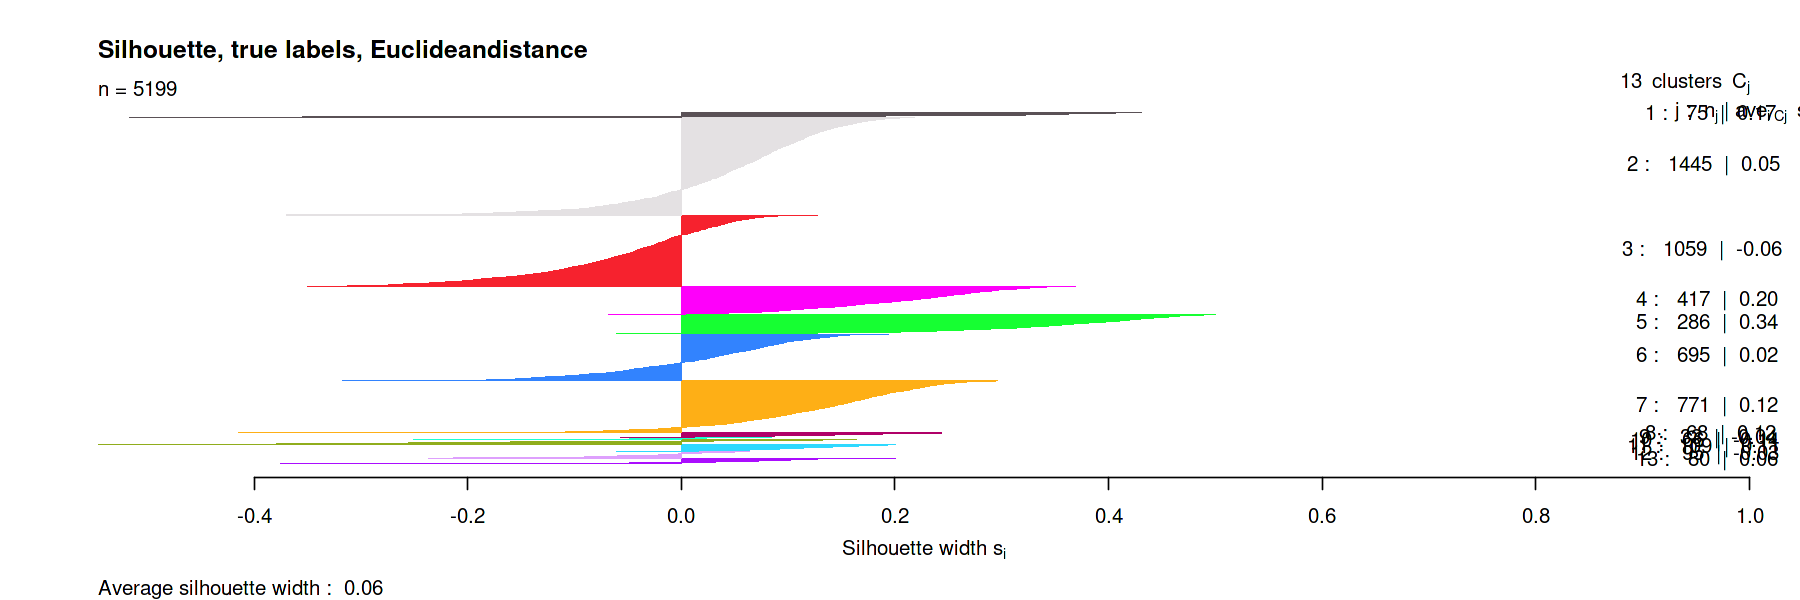

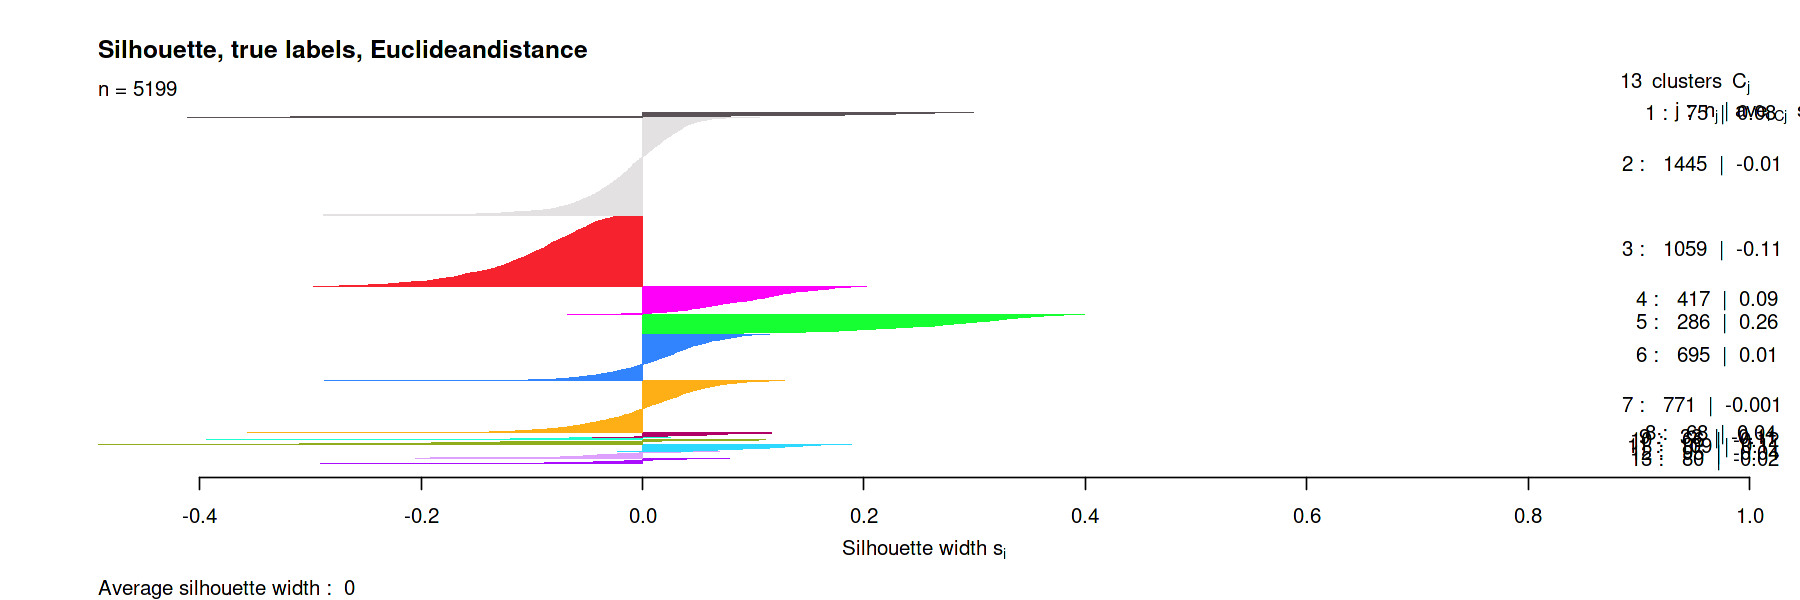

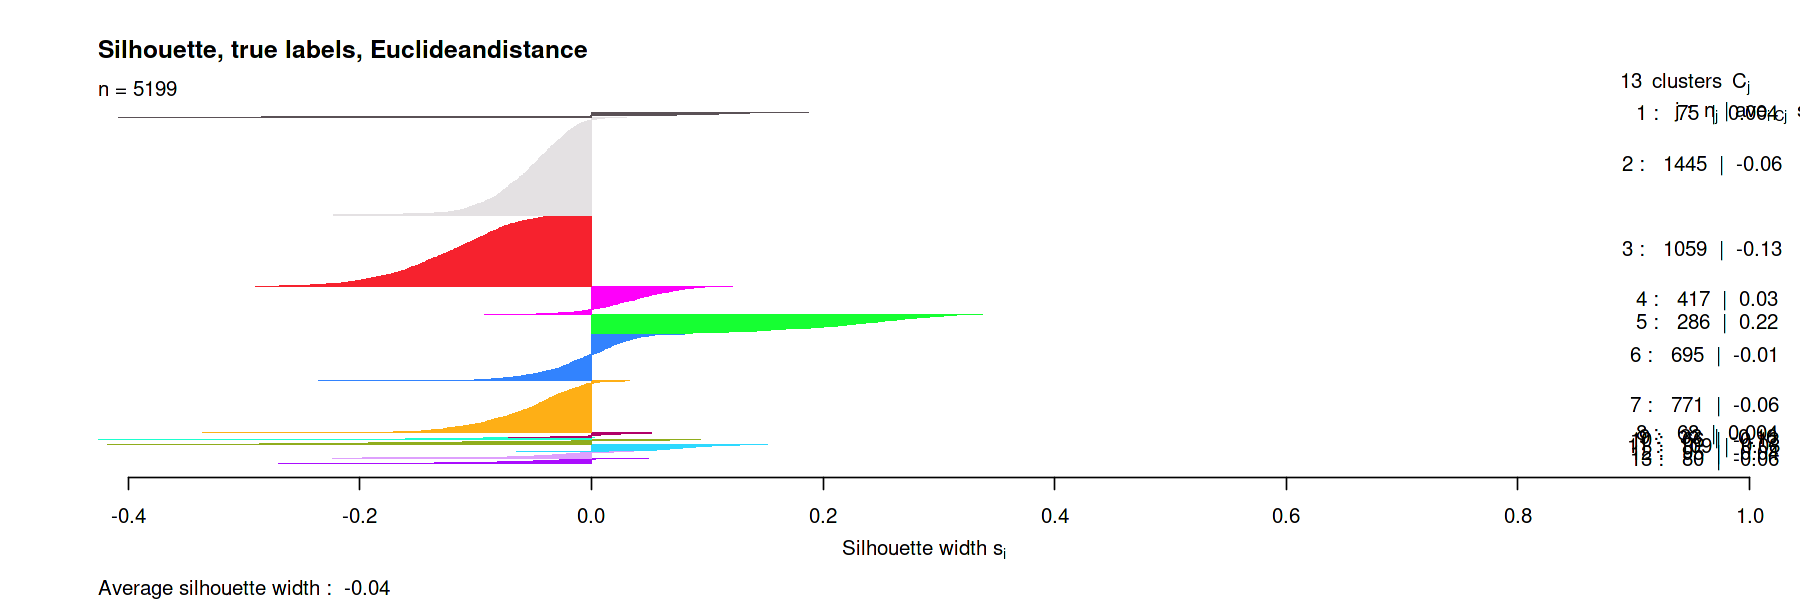

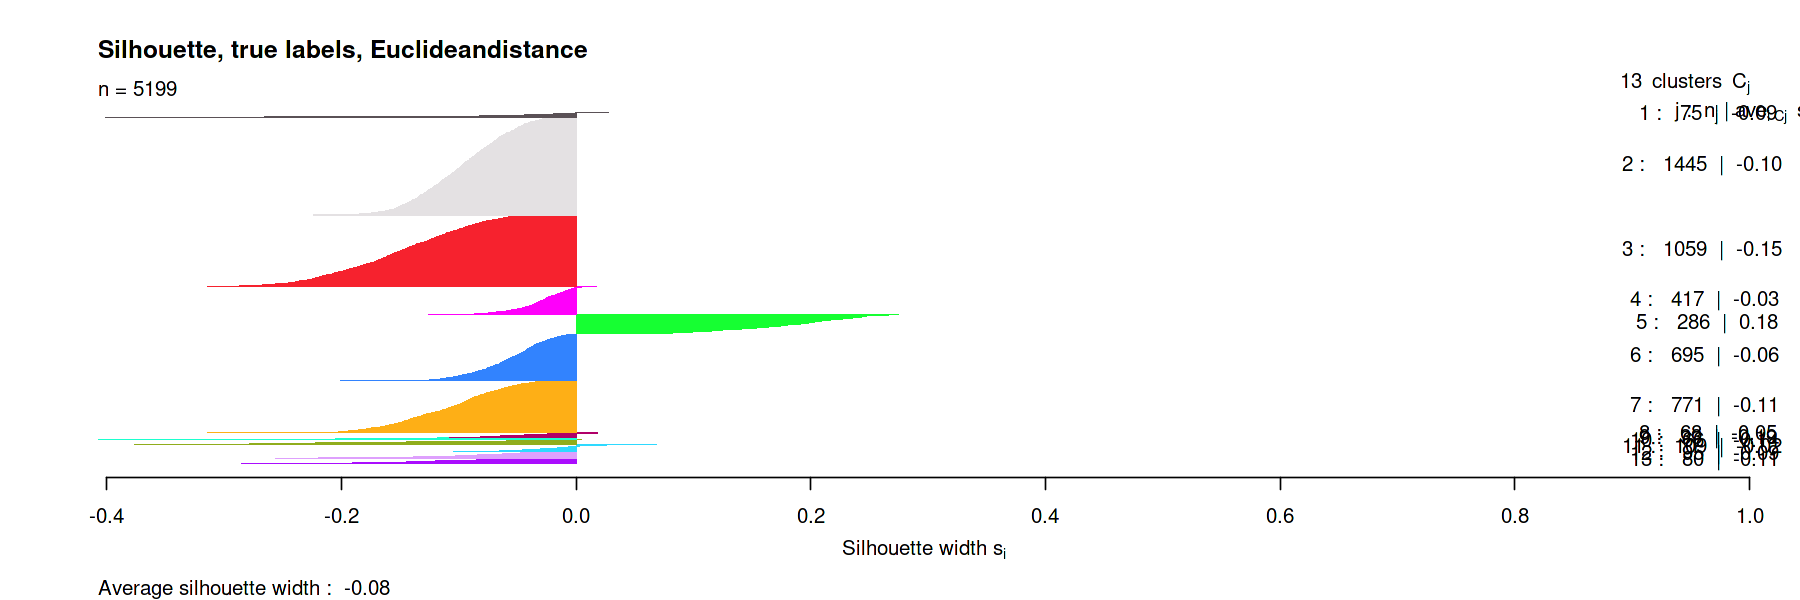

In [159]:
df <- data.frame(ndim=c(15,30,50,100), Silhouette_label=NA, cLISI_label=NA)

for (i in 1:4){
    embed <- unlist(embed_ls[[i]])
    # calculating Silhouette score
    dist.matrix <- cal_distance(embed, metric=dist_metric)

    metric <- "Silhouette_label"
    title <- paste0("Silhouette, ", "true labels, ", dist_metric, "distance")
    re2 <- silhouette_result(dist.matrix, true_labels, title=title)

    metric <- "cLISI_label"
    title <- paste0("cLISI, ", "true labels")
    re4 <- lisi_result(x=embed, 
                    meta_data=data.frame(clusterings=true_labels), 
                    label_colname="clusterings", 
                    perplexity = 30, 
                    nn_eps = 0, 
                    main=title)
    df[i,"Silhouette_label"] <- re2$avg
    df[i,"cLISI_label"] <- re4$avg
}

In [160]:
df

ndim,Silhouette_label,cLISI_label
<dbl>,<dbl>,<dbl>
15,0.0607840130,1.529726
30,-0.0009804405,1.783484
50,-0.0390608128,2.011038
100,-0.0840017859,2.449698


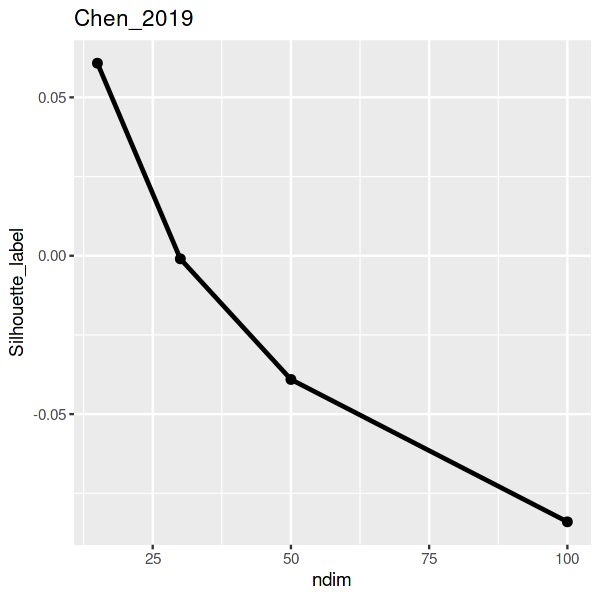

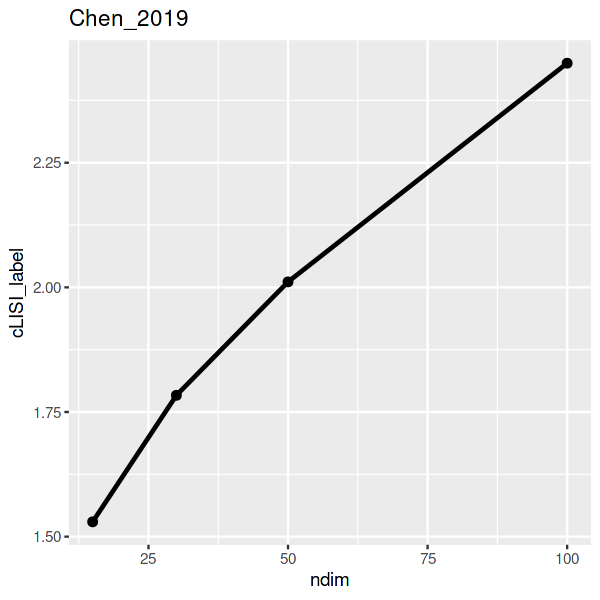

In [161]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(ndim, Silhouette_label)) +
geom_point(size=2) +
geom_line(size=1) + 
labs(x = "ndim", y = "Silhouette_label", title = dataset)

options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(ndim, cLISI_label)) +
geom_point(size=2) +
geom_line(size=1) + 
labs(x = "ndim", y = "cLISI_label", title = dataset)

If only use the first 15 dimensions

In [162]:
embed_ls <- list(embed[,1:15], cbind(embed[,1:15], embed[,1:15]), cbind(embed[,1:15], embed[,1:15], embed[,1:15], embed[,1:5]), 
cbind(embed[,1:15], embed[,1:15], embed[,1:15], embed[,1:15], embed[,1:15], embed[,1:15], embed[,1:10]))

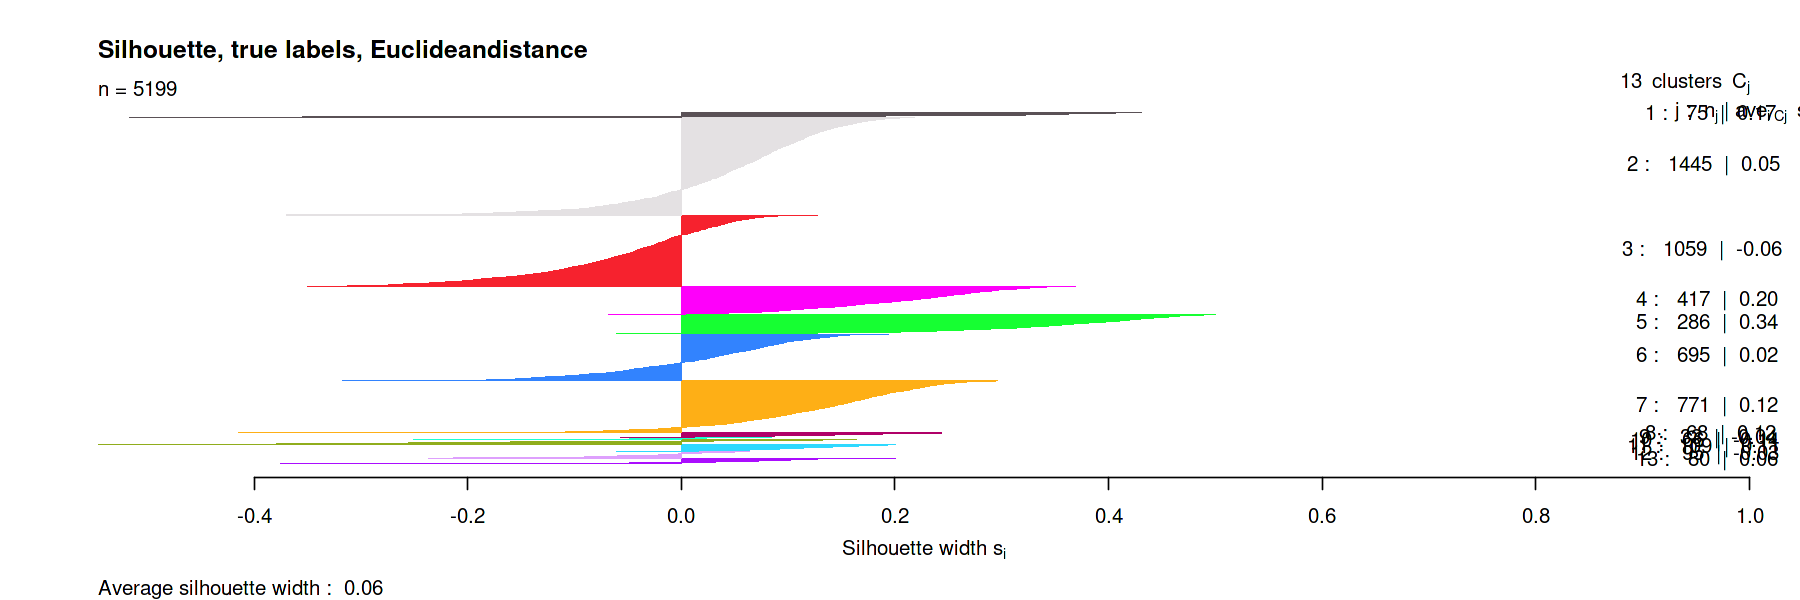

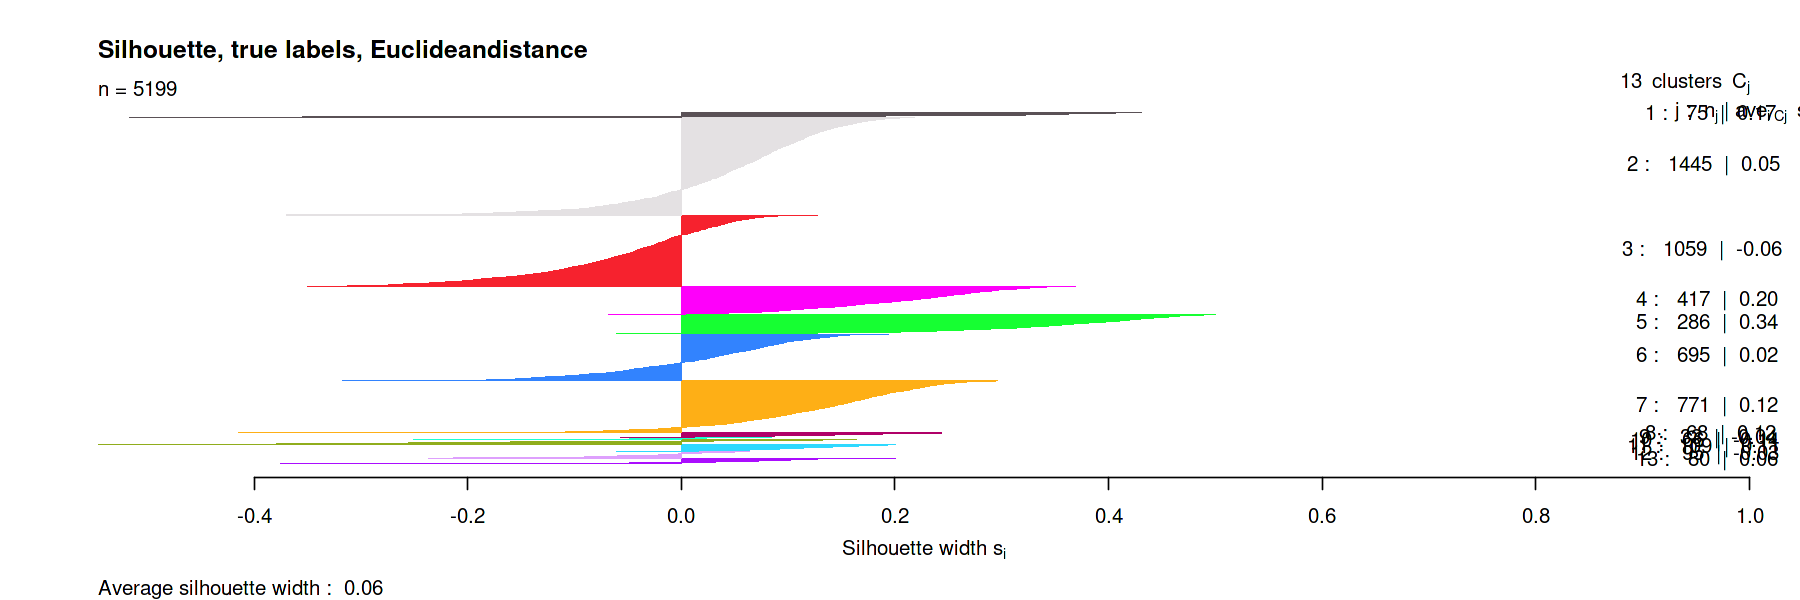

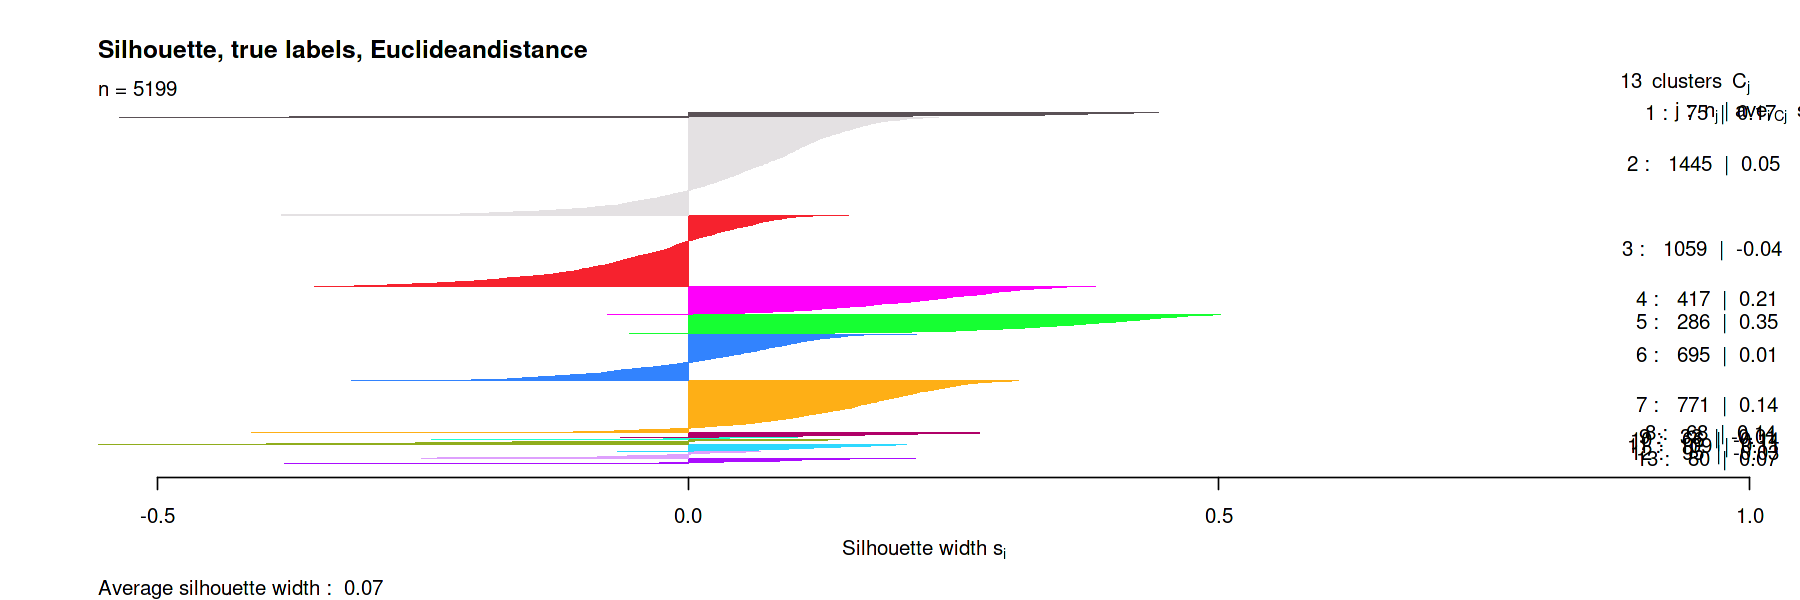

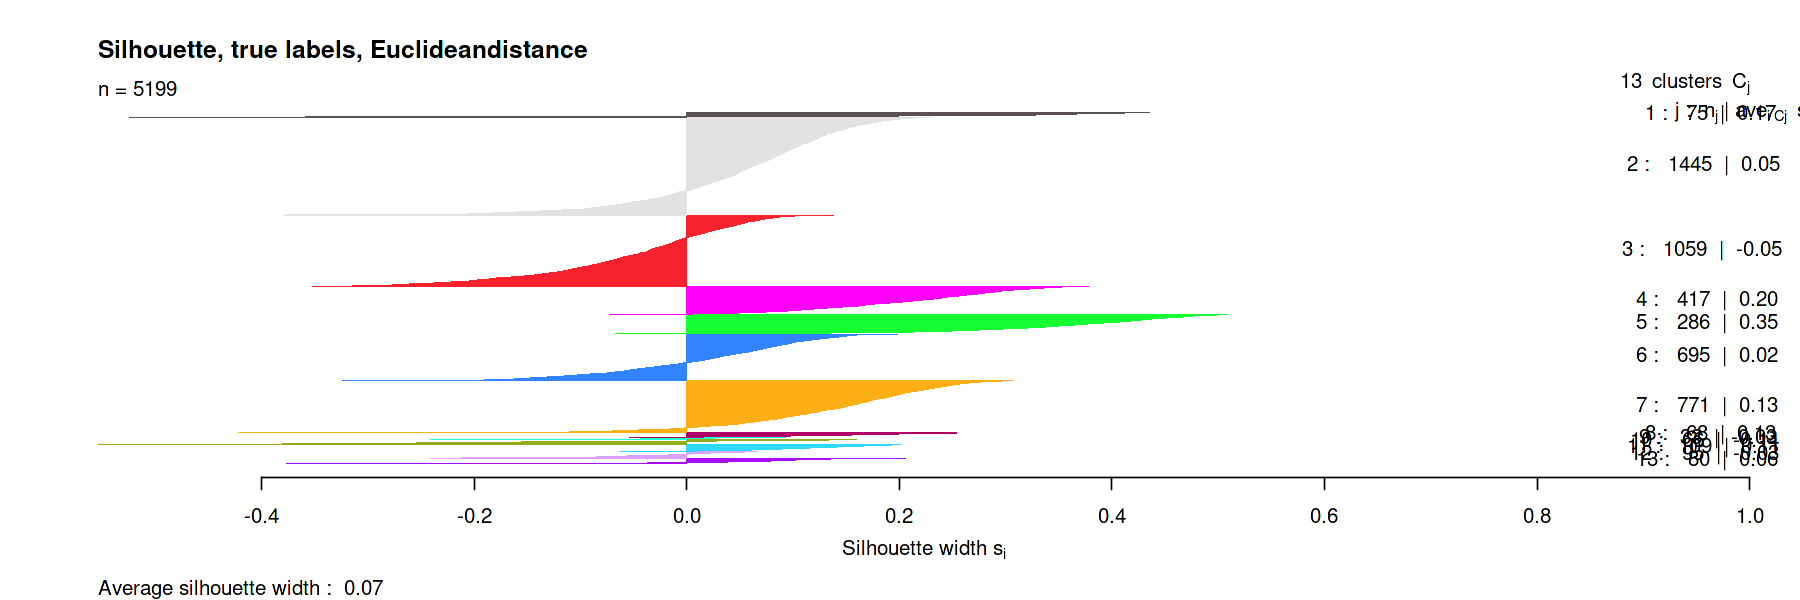

In [163]:
df2 <- data.frame(ndim=c(15,30,50,100), Silhouette_label=NA, cLISI_label=NA)

for (i in 1:4){
    embed <- unlist(embed_ls[[i]])
    # calculating Silhouette score
    dist.matrix <- cal_distance(embed, metric=dist_metric)

    metric <- "Silhouette_label"
    title <- paste0("Silhouette, ", "true labels, ", dist_metric, "distance")
    re2 <- silhouette_result(dist.matrix, true_labels, title=title)

    metric <- "cLISI_label"
    title <- paste0("cLISI, ", "true labels")
    re4 <- lisi_result(x=embed, 
                    meta_data=data.frame(clusterings=true_labels), 
                    label_colname="clusterings", 
                    perplexity = 30, 
                    nn_eps = 0, 
                    main=title)
    df2[i,"Silhouette_label"] <- re2$avg
    df2[i,"cLISI_label"] <- re4$avg
}

In [154]:
df2

ndim,Silhouette_label,cLISI_label
<dbl>,<dbl>,<dbl>
15,0.06078401,1.529726
30,0.06078401,1.529726
50,0.06931861,1.478938
100,0.06578565,1.506747


In [164]:
df$type <- "original"
df2$type <- "first 15 dim"
df <- rbind(df, df2)

In [165]:
df

ndim,Silhouette_label,cLISI_label,type
<dbl>,<dbl>,<dbl>,<chr>
15,0.0607840130,1.529726,original
30,-0.0009804405,1.783484,original
50,-0.0390608128,2.011038,original
100,-0.0840017859,2.449698,original
15,0.0607840130,1.529726,first 15 dim
30,0.0607840130,1.529726,first 15 dim
50,0.0693186108,1.478938,first 15 dim
100,0.0657856495,1.506747,first 15 dim


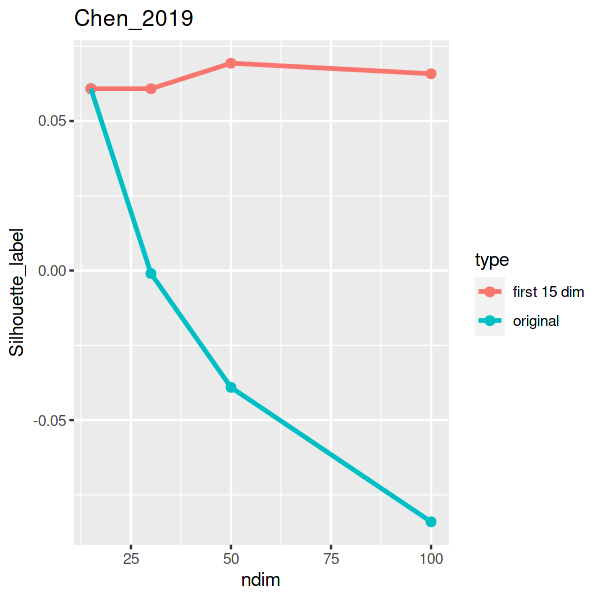

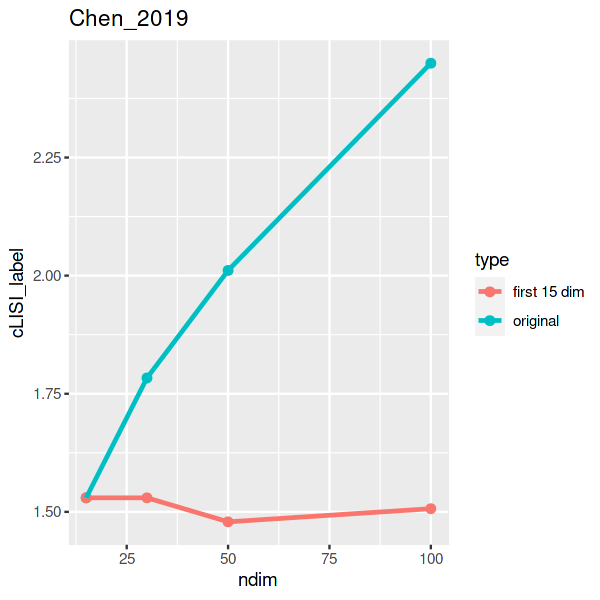

In [166]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(ndim, Silhouette_label, group = type, color=type)) +
geom_point(size=2) +
geom_line(size=1) + 
labs(x = "ndim", y = "Silhouette_label", title = dataset)

options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(ndim, cLISI_label, group = type, color=type)) +
geom_point(size=2) +
geom_line(size=1) + 
labs(x = "ndim", y = "cLISI_label", title = dataset)

# Other explorations

#### Compare the clustering using Seurat vs r-igraph

In [35]:
clustering_file <- "/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/archive/clustering/SnapATAC2/default/500/jaccard/100/r0.5.tsv"
df_clustering <-  read.table(file = clustering_file, sep = "\t")
rownames(df_clustering) <- df_clustering$barcode
clustering <- df_clustering$clustering

In [36]:
table(clustering)

clustering
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2552 2547 1445 2321 2676 1739 1663  364  621  602 1157 1996    1  214    4    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    3    6    1    1    1    1    2    2    1    1    1    1    1    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    1    1    1    1    1    1    1    1    1    2    1    1    3    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    1    1    1    1    1    1    1    1    1    2    1    1    1    2 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    3    1    1    2    1    1    1    1    4    1    1    1    1    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   1    1    1    1    1    1    1    1    1    1    2    1    1    1    1    1 
  97   98   99  1

In [37]:
sum(table(clustering) > 3)

[1] 16

In [32]:
clustering_file <- "/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/candidate1/candidate1/clustering/SnapATAC2/default/500/jaccard/100/r0.5.tsv"
df_clustering <-  read.table(file = clustering_file, sep = "\t")
rownames(df_clustering) <- df_clustering$barcode
clustering <- df_clustering$clustering

In [34]:
table(clustering)

clustering
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2998 1724 1712 1555 1478 1364 1364 1281 1193  970  945  812  801  620  450  373 
  17   18 
 350  214 

In [33]:
sum(table(clustering) > 1)

[1] 18

#### Test ScaleDim in ArchR

In [38]:
rowZscores <- function(m = NULL, min = -2, max = 2, limit = FALSE){
  z <- sweep(m - rowMeans(m), 1, matrixStats::rowSds(m),`/`)
  if(limit){
    z[z > max] <- max
    z[z < min] <- min
  }
  return(z)
}

In [47]:
x <- matrix(1:9,nrow=3)
x
t(x)

1,4,7
2,5,8
3,6,9


1,2,3
4,5,6
7,8,9


In [45]:
rowZscores(x)

-1,0,1
-1,0,1
-1,0,1


In [53]:
x <- t(matrix(c(1,2,3,1,3,3,10,11,12),nrow=3))
x

1,2,3
1,3,3
10,11,12


In [54]:
rowZscores(t(x))

-0.5773503,-0.5773503,1.154701
-0.6757374,-0.4730162,1.148754
-0.5773503,-0.5773503,1.154701
